<h1> Battle of the sister islands

<h3> 
Capstone Project - June 2020

_Author : Caroline Jean-Pierre_

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Import necessary libraries</a>

2. <a href="#item2">Data Collection and pre-processing</a>

3. <a href="#item3">Analysis of the Borough of each Island</a>

4. <a href="#item4">Import venues and explore Neighboroods of the most dynamic boroughs of Martinique and Guadeloupe</a>

5. <a href="#item5"> Cluster Neighborhoods</a>    

6. <a href="#item6">  Examine Clusters</a> 
    
</font>
</div>

<a id='item1'></a>
<h2> 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

In [2]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt

<a id='item2'></a>

<h2> 2. Data Collection and pre-processing

<h3>2.1 Import government data for Martinique (code 972) and Guadeloupe (code 971) from 2017 to 2019

In [4]:
#data for 2019
!wget -q -O '2019_971.csv.gz' https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2019/departements/971.csv.gz
!wget -q -O '2019_972.csv.gz' https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2019/departements/972.csv.gz
#data for 2018
!wget -q -O '2018_971.csv.gz' https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2018/departements/971.csv.gz
!wget -q -O '2018_972.csv.gz' https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2018/departements/972.csv.gz
#data for 2017
!wget -q -O '2017_971.csv.gz' https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2017/departements/971.csv.gz
!wget -q -O '2017_972.csv.gz' https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2017/departements/972.csv.gz
    
print('Data downloaded!')

Data downloaded!


<h3> 2.2 Convert Guadeloupe data into panda DataFrames

In [5]:
df_2019_971=pd.read_csv('2019_971.csv.gz')
df_2018_971=pd.read_csv('2018_971.csv.gz')
df_2017_971=pd.read_csv('2017_971.csv.gz')

Let's check if the 3 created dataframes  have the same data structure before creating a combined data frame for Guadeloupe

In [6]:
print(df_2019_971.columns==df_2018_971.columns)
print(df_2018_971.columns==df_2017_971.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [7]:
df_971_combined=df_2019_971.append(df_2018_971).append(df_2017_971)

In [8]:
df_971_combined.shape

(14477, 40)

In [9]:
df_971_combined.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

<h3>2.3 Convert Martinique data into panda DataFrames

In [10]:
df_2019_972=pd.read_csv('2019_972.csv.gz')
df_2018_972=pd.read_csv('2018_972.csv.gz')
df_2017_972=pd.read_csv('2017_972.csv.gz')

Let's check if the 3 created dataframes  have the same data structure before creating a combined data frame for Martinique

In [11]:
print(df_2019_972.columns==df_2018_972.columns)
print(df_2018_972.columns==df_2017_972.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [12]:
df_972_combined=df_2019_972.append(df_2018_972).append(df_2017_972)

In [13]:
df_972_combined.shape

(14770, 40)

In [14]:
df_972_combined.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [15]:
df_972_combined.head()

id_mutation date_mutation  numero_disposition nature_mutation  \
0  2019-1058224    2019-01-22                   1           Vente   
1  2019-1058224    2019-01-22                   1           Vente   
2  2019-1058225    2019-01-22                   1           Vente   
3  2019-1058225    2019-01-22                   1           Vente   
4  2019-1058226    2019-01-17                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe adresse_nom_voie  \
0          68800.0          5474.0               F   CHEM SAINVILLE   
1          68800.0          5474.0               F   CHEM SAINVILLE   
2          10000.0             NaN             NaN         LE BOURG   
3          10000.0             5.0             NaN   RUE JUSTIN ROC   
4         250000.0             NaN             NaN  PETERS MAILLETS   

  adresse_code_voie  code_postal  ...  type_local surface_reelle_bati  \
0              0333      97215.0  ...      Maison                18.0   
1              0333      97215.0  ...      Maison                18.0   
2              B005      97223.0  ...         NaN                 NaN   
3              0015      97223.0  ...         NaN                 NaN   
4              B175      97270.0  ...         NaN                 NaN   

   nombre_pieces_principales  code_nature_culture    nature_culture  \
0                        2.0                    S              sols   
1                        2.0                    T            terres   
2                        NaN                    S              sols   
3                        NaN                   AB  terrains a bâtir   
4                        NaN                    S              sols   

  code_nature_culture_speciale  nature_culture_speciale  surface_terrain  \
0                          NaN                      NaN             30.0   
1                          NaN                      NaN            950.0   
2                          NaN                      NaN              5.0   
3                          NaN                      NaN            115.0   
4                          NaN                      NaN           1147.0   

   longitude   latitude  
0 -60.959734  14.519102  
1 -60.959734  14.519102  
2 -61.027700  14.479612  
3 -61.027679  14.479545  
4 -60.915982  14.558815  

[5 rows x 40 columns]

<a id='item3'></a>

<h2> 3. Analysis of the Boroughs and real estate transactions of each Island

<h3> 3.1 Let's have a quick overview of the data

<h4> 3.1.1 Let's see the number of boroughs and neighborhoods in the data

In [16]:
print('The Guadeloupe dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_971_combined['nom_commune'].unique()),
      len(df_971_combined['adresse_nom_voie'].unique())))

The Guadeloupe dataframe has 34 boroughs and 2314 neighborhoods.


In [17]:
print('The Martinique dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_972_combined['nom_commune'].unique()),
      len(df_972_combined['adresse_nom_voie'].unique())))

The Martinique dataframe has 34 boroughs and 2055 neighborhoods.


<h4> 3.1.2 Let's analyse the real estate transactions and prices for the period 2017-2019

Let's count the number of real estate transaction over the period

In [18]:
len(df_971_combined['id_mutation'].unique())

8266

In [19]:
len(df_972_combined['id_mutation'].unique())

6551

Let's estimate the price per meter square for a construction

In [20]:
Total_value_971=df_971_combined[['id_mutation','valeur_fonciere']].drop_duplicates(subset='id_mutation',keep='first').sum(axis=0)[1]
Total_value_972=df_972_combined[['id_mutation','valeur_fonciere']].drop_duplicates(subset='id_mutation',keep='first').sum(axis=0)[1]

In [21]:
Total_surface_971=df_971_combined[['surface_reelle_bati']].sum(axis=0)[0]
Total_surface_972=df_972_combined[['surface_reelle_bati']].sum(axis=0)[0]

In [22]:
print('The price per meter square for a contruction in Guadeloupe is :',round(Total_value_971/Total_surface_971,2))
print('The price per meter square for a contruction in Martinique is :',round(Total_value_972/Total_surface_972,2))

The price per meter square for a contruction in Guadeloupe is : 2493.91
The price per meter square for a contruction in Martinique is : 2158.1


<h4> 3.1.3 Let's see which boroughs had the highest number of real estate transactions over the period 2017-2019 and their weight in the real estate market

In [23]:
df_971_highest=df_971_combined.drop_duplicates(subset='id_mutation',keep='first').groupby('nom_commune').count().sort_values('id_mutation',ascending=False)[['id_mutation']]

In [24]:
df_971_highest.columns=['Count of transaction']
df_971_highest=df_971_highest.reset_index()
df_971_highest.head()

nom_commune  Count of transaction
0  Saint-François                   888
1    Baie-Mahault                   846
2    Saint-Martin                   703
3       Le Gosier                   682
4      Les Abymes                   679

Let's create bins to classify the boroughs per number of transactions

In [25]:
bins_971 = (0,50,250,500,750,1000)
bins_971

(0, 50, 250, 500, 750, 1000)

Let's add the bins to the data frame

In [26]:
group_names_971=['Less 50 transactions', '50-250 transactions', '250-500 transactions','500-750 transactions','750-1000 transactions']

In [27]:
df_971_highest['Count of transaction_binned'] = pd.cut(df_971_highest['Count of transaction'], bins_971, labels=group_names_971, include_lowest=True )
df_971_highest_binned=df_971_highest[['Count of transaction','Count of transaction_binned']].groupby('Count of transaction_binned').sum()

In [51]:
df_971_highest.head(7)

nom_commune  Count of transaction Count of transaction_binned
0  Saint-François                   888       750-1000 transactions
1    Baie-Mahault                   846       750-1000 transactions
2    Saint-Martin                   703        500-750 transactions
3       Le Gosier                   682        500-750 transactions
4      Les Abymes                   679        500-750 transactions
5     Petit-Bourg                   540        500-750 transactions
6        Le Moule                   513        500-750 transactions

Now let's group the transactions by bins and count the number of boroughs in each bin

In [32]:
df_971_highest_binned['Count of Boroughs']=df_971_highest.groupby('Count of transaction_binned').count()['nom_commune'].values

In [33]:
df_971_highest_binned.head()

Count of transaction  Count of Boroughs
Count of transaction_binned                                         
Less 50 transactions                          209                  6
50-250 transactions                          2221                 18
250-500 transactions                          985                  3
500-750 transactions                         3117                  5
750-1000 transactions                        1734                  2

Text(0.5, 1.0, 'Guadeloupe - Number of real estate transaction per boroughs')

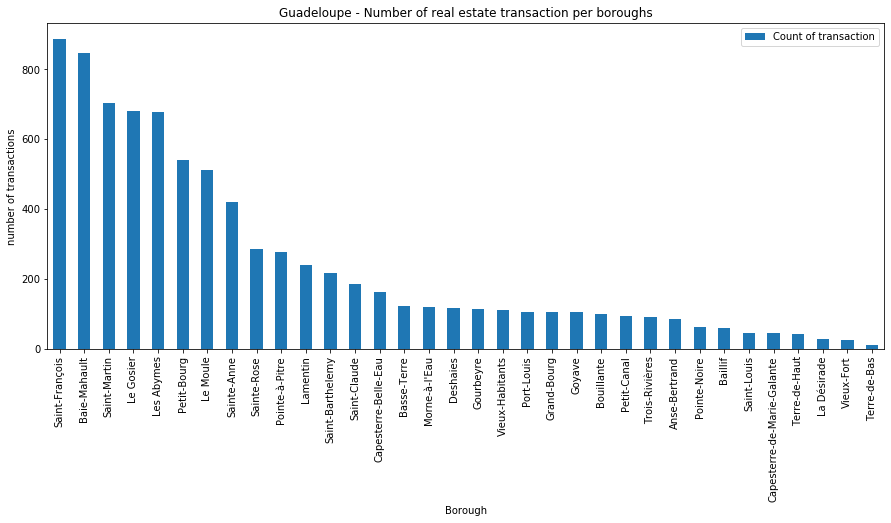

In [53]:
df_971_highest.set_index('nom_commune').plot(kind='bar', figsize=(15, 6), rot=90) # rotate the bars by 90 degrees

plt.ylabel('number of transactions')
plt.xlabel('Borough')
plt.title('Guadeloupe - Number of real estate transaction per boroughs')

In [34]:
legend_971=[(),(),(),(),()]
for i in range(0,5):
    legend_971[i]=(df_971_highest_binned.index[i],df_971_highest_binned['Count of Boroughs'].iloc[i],'boroughs')
legend_971=list(legend_971)

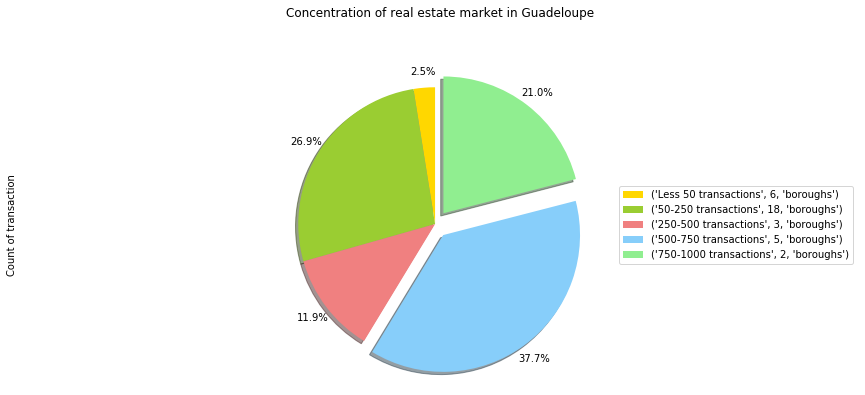

In [73]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0 , 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_971_highest_binned['Count of transaction'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,     # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list)

# scale the title up by 12% to match pctdistance
plt.title('Concentration of real estate market in Guadeloupe', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=legend_971, loc='center right') 

plt.show()

Four Boroughs (Baie-Mahault, Le Gosier, Les Abymes, Saint-François) had more than 600 transactions over the period and count for 45% of the transactions
NB : We can see that the data contains "Saint Martin" Island which is administratevily attached to Guadeloupe but is actually another Island so we won't take into account Saint Martin data in our analysis

In [38]:
df_972_highest=df_972_combined.drop_duplicates(subset='id_mutation',keep='first').groupby('nom_commune').count().sort_values('id_mutation',ascending=False)[['id_mutation']]

In [39]:
df_972_highest.columns=['Count of transaction']
df_972_highest=df_972_highest.reset_index()
df_972_highest.head()

nom_commune  Count of transaction
0   Fort-de-France                  1500
1      Le Lamentin                   572
2        Schœlcher                   562
3  Les Trois-Îlets                   514
4        Le Robert                   345

Let's create bins to classify the boroughs per number of transactions

In [40]:
bins_972 = (0,50,250,500,750,1000,1500)
bins_972

(0, 50, 250, 500, 750, 1000, 1500)

Let's add the bins to the data frame

In [41]:
group_names_972=['Less 50 transactions', '50-250 transactions', '250-500 transactions','500-750 transactions','750-1000 transactions','1000-1500 transactions']

In [42]:
df_972_highest['Count of transaction_binned'] = pd.cut(df_972_highest['Count of transaction'], bins_972, labels=group_names_972, include_lowest=True )
df_972_highest_binned=df_972_highest[['Count of transaction','Count of transaction_binned']].groupby('Count of transaction_binned').sum()

In [43]:
df_972_highest.head()

nom_commune  Count of transaction Count of transaction_binned
0   Fort-de-France                  1500      1000-1500 transactions
1      Le Lamentin                   572        500-750 transactions
2        Schœlcher                   562        500-750 transactions
3  Les Trois-Îlets                   514        500-750 transactions
4        Le Robert                   345        250-500 transactions

Now let's group the transactions by bins and count the number of boroughs in each bin

In [44]:
df_972_highest_binned['Count of Boroughs']=df_972_highest.groupby('Count of transaction_binned').count()['nom_commune'].values

In [45]:
df_972_highest_binned

Count of transaction  Count of Boroughs
Count of transaction_binned                                         
Less 50 transactions                          285                 11
50-250 transactions                          2218                 16
250-500 transactions                          900                  3
500-750 transactions                         1648                  3
750-1000 transactions                           0                  0
1000-1500 transactions                       1500                  1

Text(0.5, 1.0, 'Martinique - Number of real estate transactions per boroughs')

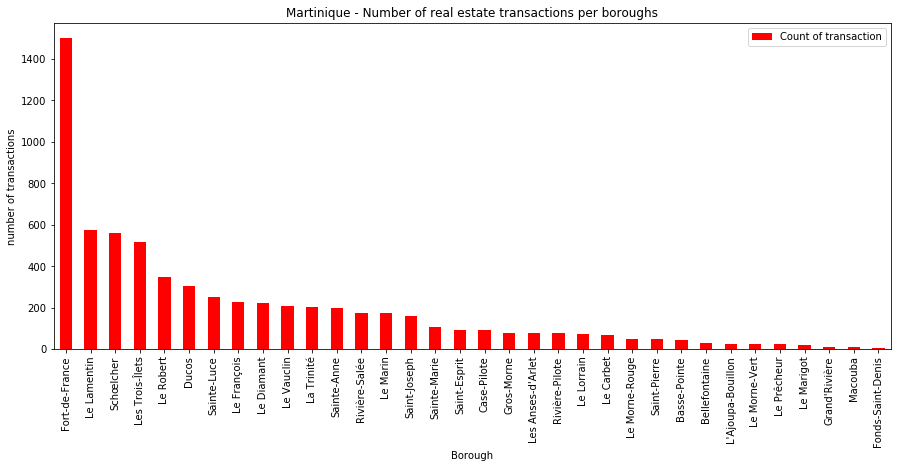

In [75]:
df_972_highest.set_index('nom_commune').plot(kind='bar', figsize=(15, 6), rot=90, color='red') # rotate the bars by 90 degrees

plt.ylabel('number of transactions')
plt.xlabel('Borough')
plt.title('Martinique - Number of real estate transactions per boroughs')

In [47]:
legend_972=[(),(),(),(),(),()]
for i in range(0,6):
    legend_972[i]=(df_972_highest_binned.index[i],df_972_highest_binned['Count of Boroughs'].iloc[i],'boroughs')
legend_972=list(legend_972)

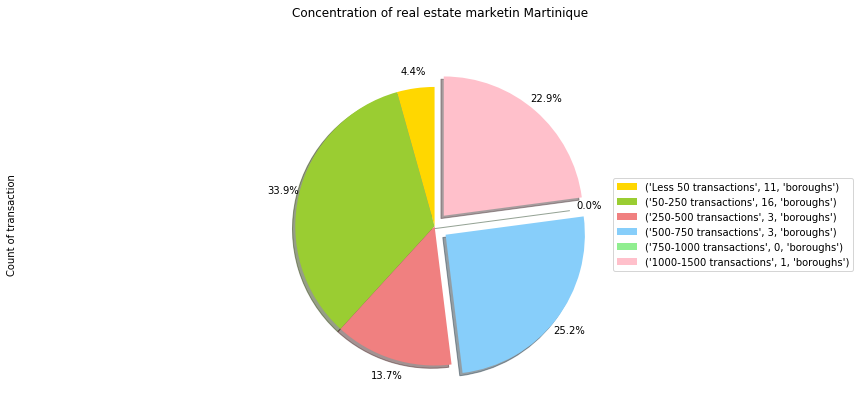

In [77]:

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0 ,0.1, 0, 0.1] # ratio for each continent with which to offset each wedge.

df_972_highest_binned['Count of transaction'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list)

# scale the title up by 12% to match pctdistance
plt.title('Concentration of real estate marketin Martinique', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=legend_972, loc='center right') 

plt.show()

Four Boroughs (Fort-de-France, Le Lamentin, Shoelcher, Les Trois-îlets) had more than 500 transactions over the period.

<h3>3.2 Let's create dataframes with the boroughs, neibourghoods and geolocations for each island

<h4> 3.2.1 Create Guadeloupe Neighborhood geolocation dataframe and clean the data

In [78]:
df_971_neighborhood=df_971_combined[['adresse_nom_voie','nom_commune','code_commune','latitude','longitude']]

Let's drop the duplicated neighborhoods

In [79]:
df_971_neighborhood_nodup=df_971_neighborhood.copy().drop_duplicates(subset='adresse_nom_voie',keep='first')

In [80]:
df_971_neighborhood_nodup.shape

(2314, 5)

Let's check if the dataframe has Nan latitude and longitude Values

In [81]:
df_971_neighborhood_nodup[df_971_neighborhood_nodup.isna()['adresse_nom_voie']==True]

adresse_nom_voie nom_commune  code_commune   latitude  longitude
739              NaN  Les Abymes         97101  16.250595 -61.519328

In [82]:
df_971_neighborhood_nodup[df_971_neighborhood_nodup.isna()['code_commune']==True]

Empty DataFrame
Columns: [adresse_nom_voie, nom_commune, code_commune, latitude, longitude]
Index: []

In [83]:
df_971_neighborhood_nodup[df_971_neighborhood_nodup.isna()['latitude']==True]

adresse_nom_voie                  nom_commune  \
149                GRAND CUL DE SAC             Saint-Barthelemy   
173         RUE LEON PHILIS SEYMOUR         Capesterre-Belle-Eau   
229                 BAIE DE MARIGOT                Terre-de-Haut   
311                   CHE THOMASEAU              Vieux-Habitants   
415                   LA ROSE OUEST                       Goyave   
477        CD NO 209 DIT DE LORIENT             Saint-Barthelemy   
520           RUE RUE DES BALISIERS                 Pointe-Noire   
964                          LALUNG                  Petit-Bourg   
1382                  LES QUARTIERS                   Les Abymes   
1429                     BEAUSEJOUR  Capesterre-de-Marie-Galante   
1473                  RTE DE RICHER                  Sainte-Anne   
1476              CABOUT MONPLAISIR                  Petit-Bourg   
1477                         CABOUT                  Petit-Bourg   
1482                      LA SAVANE                  La Désirade   
1782                   BOIS SERGENT                  Petit-Bourg   
2011                       NOLIVIER                  Sainte-Rose   
2013                  BELLEVUE NORD                    Le Gosier   
2064                        GOSSAIN                 Baie-Mahault   
2070                       MATHURIN                    Le Gosier   
2087               IMP MAURICE RENE                  Petit-Bourg   
2130                      LE DESERT                  La Désirade   
2228            LOT CANNE EN FLEURS                  Sainte-Rose   
2234                 CHE DE JOBETIE                  Sainte-Rose   
2248             RUE JOSEPH MALEAMA                     Le Moule   
2339                       CARRIERE                  Sainte-Anne   
2352              POINTE D OR OUEST                   Les Abymes   
2483                     FONTARABIE                  Petit-Bourg   
2503                   CHE DE VIARD                  Petit-Bourg   
2597                  LA BAIE OLIVE               Saint-François   
2665              RTE DU FLIBUSTIER                  Sainte-Anne   
2750                  RTE NATIONALE                     Lamentin   
2868               RUE J.F. KENNEDY                     Le Moule   
3049                       FENETEAU                  Petit-Bourg   
3094                       BELCOURT                 Baie-Mahault   
3103           CHE DES AGRICULTEURS                  Petit-Canal   
3113                          DAVID                   Les Abymes   
3117                   RTE DE VIARD                  Petit-Bourg   
3120                CHE DE POMBIRAY               Saint-François   
94                          LA CITE              Vieux-Habitants   
1035                       DEBOULES                     Deshaies   
1082       RUE DES ANCIENNES ECOLES                      Baillif   
2230                CHE DE CHOUCHOU                     Lamentin   
2231               RUE DE LA MARINE  Capesterre-de-Marie-Galante   
2458  RES BOUGAINVILLIERS A PERINET                    Le Gosier   
3178                        GERMAIN                  Sainte-Anne   
3296                      MARIEULLE                Morne-à-l'Eau   
4322          ECOLE CIDEME SALVATOR               Pointe-à-Pitre   
4625                       CABANICE  Capesterre-de-Marie-Galante   
4736                     COURCELLES                  Sainte-Anne   
5977                       BOULIQUI                  Sainte-Anne   
6000                      CROUSTERE                Morne-à-l'Eau   
1649                  RUE LAMARTINE               Pointe-à-Pitre   
2007     CHE DE BAS CANAL PIERRETTE                     Lamentin   
3494      RES LA MANGROVE LE RAIZET                   Les Abymes   
4132                  CHE PINADIERE                     Le Moule   

      code_commune  latitude  longitude  
149          97123       NaN        NaN  
173          97107       NaN        NaN  
229          97131       NaN        NaN  
311          97134       NaN        NaN  


In [84]:
df_971_neighborhood_clean=df_971_neighborhood_nodup.dropna(axis=0)

In [85]:
df_971_neighborhood_clean.shape

(2258, 5)

In [86]:
df_971_neighborhood_clean.index=range(0,2258)
df_971_neighborhood_clean.tail()

adresse_nom_voie nom_commune  code_commune   latitude  longitude
2253           LA VERDURE   Le Gosier         97113  16.208917 -61.507531
2254       CHE DE GROSSOU    Lamentin         97115  16.256934 -61.658441
2255  IMM SHOPPING CENTER  Les Abymes         97101  16.257179 -61.521597
2256              L UNION  Les Abymes         97101  16.255364 -61.516386
2257      RTE BELLE PLACE   Le Gosier         97113  16.217717 -61.455441

Let's check if the dataframe has null values

In [87]:
n=0
for i in range(0,2258):
    if df_971_neighborhood_clean.loc[i,'latitude']==0 or df_971_neighborhood_clean.loc[i,'longitude']==0 :
        print('index:',i,df_971_neighborhood_clean.loc[i,'latitude'], df_971_neighborhood_clean.loc[i,'longitude'])
    else:
        n=n+1
print(n, "values are not null")

2258 values are not null


Let's have a the columns in English

In [88]:
df_971_neighborhood_clean.columns=["Neighborhood","Borough",'Borough_code','latitude','longitude']

In [89]:
df_971_neighborhood_clean.head()

Neighborhood               Borough  Borough_code   latitude  \
0     GROS MORNE DOLE             Gourbeyre         97109  15.997197   
1       RTE DU BOEING              Deshaies         97111  16.314316   
2  RUE DE LA BATTERIE  Capesterre-Belle-Eau         97107  16.009766   
3       FORTE ILE SUD                Goyave         97114  16.132124   
4           MON REPOS  Capesterre-Belle-Eau         97107  16.088061   

   longitude  
0 -61.676097  
1 -61.767283  
2 -61.590031  
3 -61.582425  
4 -61.573147

<h4> 3.2.2 Create a dataframe to focus on the top 4 dynamic boroughs of Guadeloupe

Let slice the dataframe to focus on the top 4 dynamic boroughs identified

In [90]:
df_Baie_Mahault=df_971_neighborhood_clean[df_971_neighborhood_clean["Borough"]==('Baie-Mahault')]
df_le_Gosier=df_971_neighborhood_clean[df_971_neighborhood_clean["Borough"]==('Le Gosier')]
df_les_abymes=df_971_neighborhood_clean[df_971_neighborhood_clean["Borough"]==('Les Abymes')]
df_saint_f=df_971_neighborhood_clean[df_971_neighborhood_clean["Borough"]==('Saint-François')]

In [91]:
df_971_neighborhood_top4=df_Baie_Mahault.append(df_le_Gosier).append(df_les_abymes).append(df_saint_f)

In [92]:
df_971_neighborhood_top4.head()

Neighborhood       Borough  Borough_code   latitude  \
251  RES GOURDE LIANE A GOURDE LIAN  Baie-Mahault         97103  16.246800   
262                      CONVENANCE  Baie-Mahault         97103  16.235742   
275        RES IBIS I A MOUDONG SUD  Baie-Mahault         97103  16.237183   
277       IMM STRATEGIE MOUDONG SUD  Baie-Mahault         97103  16.239405   
281     RES LES MUSCADES A BELCOURT  Baie-Mahault         97103  16.260914   

     longitude  
251 -61.596841  
262 -61.604707  
275 -61.584212  
277 -61.584893  
281 -61.589451

In [93]:
print('The Guadeloupe top 4 bouroughs dataframe has',df_971_neighborhood_top4.shape[0], 'neighborhoods.')
    

The Guadeloupe top 4 bouroughs dataframe has 613 neighborhoods.


let's reset the index

In [94]:
df_971_neighborhood_top4.index=range(0,613)

<h4> 3.2.3 Create Martinique Neighborhood geolocation dataframe and clean the data

In [95]:
df_972_neighborhood=df_972_combined[['adresse_nom_voie','nom_commune','code_commune','latitude','longitude']]

In [96]:
df_972_neighborhood_nodup=df_972_neighborhood.copy().drop_duplicates(subset='adresse_nom_voie',keep='first')

In [97]:
df_972_neighborhood_nodup.shape

(2055, 5)

Let's check if the dataframe has Nan Values

In [98]:
df_972_neighborhood_nodup[df_972_neighborhood_nodup.isna()['adresse_nom_voie']==True]

adresse_nom_voie  nom_commune  code_commune   latitude  longitude
250              NaN  Le Lamentin         97213  14.643345 -61.033673

In [99]:
df_972_neighborhood_nodup[df_972_neighborhood_nodup.isna()['code_commune']==True]

Empty DataFrame
Columns: [adresse_nom_voie, nom_commune, code_commune, latitude, longitude]
Index: []

In [100]:
df_972_neighborhood_nodup[df_972_neighborhood_nodup.isna()['latitude']==True]

adresse_nom_voie     nom_commune  code_commune  latitude  \
1869                   LA HAUT   Rivière-Salée         97221       NaN   
2138  HABITATION SAINT CHARLES      Le Diamant         97206       NaN   
2261      CHEM DE LA CANNERAIE   Rivière-Salée         97221       NaN   
2262         RUE DES 2 SOURCES    Saint-Esprit         97223       NaN   
2265                BEAUREGARD     Le François         97210       NaN   
2270                 LA GIRARD     Le Prêcheur         97219       NaN   
2289    CHE CROIX ODILON (VC8)      Gros-Morne         97212       NaN   
2466         CHE MAGNAN (CR12)      Gros-Morne         97212       NaN   
609                     GUERIN         Macouba         97215       NaN   
1594                FOND CORRE    Saint-Pierre         97225       NaN   
4936                  BOCHETTE     Le Lamentin         97213       NaN   
5048                  CHENEAUX      Le Lorrain         97214       NaN   
5113             CHE PELLETIER     Le Lamentin         97213       NaN   
5126             DOMINANTE EST    Saint-Joseph         97224       NaN   
5167               RUE DU BELE    Sainte-Marie         97228       NaN   
5440                 GASCHETTE       Le Robert         97222       NaN   
5487                 DUHAMELIN      Le Marigot         97216       NaN   
1381         VC DITE DE SERAIL    Saint-Joseph         97224       NaN   
2723                LOT BALLEU    Saint-Joseph         97224       NaN   
5459      RUE DU GRAND CARAIBE  Fort-de-France         97209       NaN   
5475             ENTREE TEXACO  Fort-de-France         97209       NaN   

      longitude  
1869        NaN  
2138        NaN  
2261        NaN  
2262        NaN  
2265        NaN  
2270        NaN  
2289        NaN  
2466        NaN  
609         NaN  
1594        NaN  
4936        NaN  
5048        NaN  
5113        NaN  
5126        NaN  
5167        NaN  
5440        NaN  
5487        NaN  
1381        NaN  
2723        NaN  
5459        NaN  
5475        NaN

In [101]:
df_972_neighborhood_clean=df_972_neighborhood_nodup.dropna(axis=0)

In [102]:
df_972_neighborhood_clean.shape

(2033, 5)

In [103]:
df_972_neighborhood_clean.index=range(0,2033)
df_972_neighborhood_clean.tail()

adresse_nom_voie     nom_commune  code_commune   latitude  \
2028             CITE LACROIX       Le Robert         97222  14.682346   
2029            LOT L EVENTEE  Fort-de-France         97209  14.631568   
2030  LOT CHATEAU PAILLE NO 1      Le Vauclin         97232  14.552446   
2031  VC DE MORNE AUX GUEULES   Grand'Rivière         97211  14.860134   
2032          BEAUSEJOUR NORD   Grand'Rivière         97211  14.857293   

      longitude  
2028 -60.938163  
2029 -61.074276  
2030 -60.838415  
2031 -61.168826  
2032 -61.168284

Let's check if the dataframe has null values

In [104]:
n=0
for i in range(0,2033):
    if df_972_neighborhood_clean.loc[i,'latitude']==0 or df_972_neighborhood_clean.loc[i,'longitude']==0 :
        print('index:',i,df_972_neighborhood_clean.loc[i,'latitude'], df_972_neighborhood_clean.loc[i,'longitude'])
    else:
        n=n+1
print(n, "values are not null")

2033 values are not null


Let's change the name of the columns to English

In [105]:
df_972_neighborhood_clean.columns=["Neighborhood",'Borough','Borough_code','latitude','longitude']

In [106]:
df_972_neighborhood_clean.head()

Neighborhood         Borough  Borough_code   latitude  longitude
0       CHEM SAINVILLE   Rivière-Salée         97221  14.519102 -60.959734
1             LE BOURG      Le Diamant         97206  14.479612 -61.027700
2       RUE JUSTIN ROC      Le Diamant         97206  14.479545 -61.027679
3      PETERS MAILLETS    Saint-Esprit         97223  14.558815 -60.915982
4  ZAC ETANG Z ABRICOT  Fort-de-France         97209  14.598339 -61.043747

<h4> 3.2.4 Create a dataframe to focus on the top 4 dynamic boroughs of Martinique

Let slice the dataframe to focus on the top 4 dynamic boroughs identified

In [107]:
df_FdF=df_972_neighborhood_clean[df_972_neighborhood_clean["Borough"]==('Fort-de-France')]
df_le_lamentin=df_972_neighborhood_clean[df_972_neighborhood_clean["Borough"]==('Le Lamentin')]
df_schoelcher=df_972_neighborhood_clean[df_972_neighborhood_clean["Borough"]==('Schœlcher')]
df_trois_il=df_972_neighborhood_clean[df_972_neighborhood_clean["Borough"]==('Les Trois-Îlets')]

In [108]:
df_972_neighborhood_top4=df_FdF.append(df_le_lamentin).append(df_schoelcher).append(df_trois_il)

In [109]:
df_972_neighborhood_top4.head(20)

Neighborhood         Borough  Borough_code   latitude  \
4             ZAC ETANG Z ABRICOT  Fort-de-France         97209  14.598339   
9      BD DE LA POINTE DES NEGRES  Fort-de-France         97209  14.601060   
10     RES PRESTIGE DE LA MEYNARD  Fort-de-France         97209  14.634533   
11              RUE DES GLOUGLOUS  Fort-de-France         97209  14.629430   
12              POINTE DES GRIVES  Fort-de-France         97209  14.595388   
26         RUE MARTIN LUTHER KING  Fort-de-France         97209  14.609193   
29  RUE PROFESSEUR RAYMOND GARCIN  Fort-de-France         97209  14.621934   
46                  RTE DE MOUTTE  Fort-de-France         97209  14.629448   
48          RTE DE RAVINE VILAINE  Fort-de-France         97209  14.651044   
51             RUE FRANCOIS ARAGO  Fort-de-France         97209  14.606280   
60                   AV CONDORCET  Fort-de-France         97209  14.606443   
64            ALL DE LA LOUISIANE  Fort-de-France         97209  14.625095   
66                   VIEUX MOULIN  Fort-de-France         97209  14.628764   
68                  RUE DU PILOTE  Fort-de-France         97209  14.611523   
76                LOT LES MIMOSAS  Fort-de-France         97209  14.642213   
88                RTE DE LA FOLIE  Fort-de-France         97209  14.612355   
90     RTE DE BEAUSEJOUR JAMBETTE  Fort-de-France         97209  14.638539   
91              RUE EUGENE REVERT  Fort-de-France         97209  14.608089   
92               RES IMM LA VIGIE  Fort-de-France         97209  14.610729   
94              LOT LES AMANDIERS  Fort-de-France         97209  14.623989   

    longitude  
4  -61.043747  
9  -61.089322  
10 -61.041747  
11 -61.035388  
12 -61.045212  
26 -61.074265  
29 -61.077661  
46 -61.049335  
48 -61.060419  
51 -61.072584  
60 -61.081507  
64 -61.077466  
66 -61.079810  
68 -61.061066  
76 -61.055879  
88 -61.064225  
90 -61.041561  
91 -61.083015  
92 -61.077407  
94 -61.076705

In [110]:
print('The Martinique top 4 bouroughs dataframe has',df_972_neighborhood_top4.shape[0], 'neighborhoods.')
    

The Martinique top 4 bouroughs dataframe has 857 neighborhoods.


let's reset the index

In [111]:
df_972_neighborhood_top4.index=range(0,857)

<h3> 3.3 Let's visualize top 4 boroughs and Neighborhoods into a Maps of Martinique and Guadeloupe

Let's use average Longitude and latitude of our dataframes to create Maps of Martinique and Guadeloupe neighborhoods

In [112]:
latitude_971=df_971_neighborhood_top4['latitude'].mean()
longitude_971=df_971_neighborhood_top4['longitude'].mean()

In [113]:
latitude_972=df_972_neighborhood_top4['latitude'].mean()
longitude_972=df_972_neighborhood_top4['longitude'].mean()

In [114]:
# create map of Guadeloupe using latitude_971 and longitude_971 values
map_guada = folium.Map(location=[latitude_971, longitude_971], zoom_start=11.45)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_971_neighborhood_top4['latitude'], df_971_neighborhood_top4['longitude'], df_971_neighborhood_top4['Borough'], df_971_neighborhood_top4['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.9,
        parse_html=False).add_to(map_guada)  
    
map_guada

In [115]:
# create map of Martinique using latitude_972 and longitude_972 values
map_madinina = folium.Map(location=[latitude_972, longitude_972], zoom_start=11.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_972_neighborhood_top4['latitude'], df_972_neighborhood_top4['longitude'], df_972_neighborhood_top4['Borough'], df_972_neighborhood_top4['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.9,
        parse_html=False).add_to(map_madinina)  
    
map_madinina

<a id='item4'></a>

<h2>4. Import venues and explore Neighboroods of the most dynamic boroughs of Martinique and Guadeloupe

<h3> 4.1 Let's import the venues from Foursquare

<h4> 4.1.1 Define Foursquare Credentials, Version as well as limit and radius for the search

In [57]:
CLIENT_ID = '4KFPMF1YYYBQY2PVWBX3ZGKMIMRHNMS31D0QTIOTRMYBXFJS' # your Foursquare ID
CLIENT_SECRET = 'RP1XVUIFUHMG0PMGOZ5EFI2QXIVM2DXJKFFJ0124I1IR05IW' # your Foursquare Secret
VERSION = '20200530' # Foursquare API version

In [58]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

<h4> 4.1.2 Create a function to get the venues of each neighborhoods in a DataFrame

In [59]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<h4> 4.1.3 Get the venues of each neighborhoods for Martinique and Guadeloupe and save the dataframes in csv files

In [58]:
Guada_venues = getNearbyVenues(names=df_971_neighborhood_top4['Neighborhood'],
                                   latitudes=df_971_neighborhood_top4['latitude'],
                                   longitudes=df_971_neighborhood_top4['longitude']
                                  )

RES GOURDE LIANE A GOURDE LIAN
CONVENANCE
RES IBIS I A MOUDONG SUD
IMM STRATEGIE MOUDONG SUD
RES LES MUSCADES A BELCOURT
LOT BEAUJEAN A LA JAILLE
RUE ANDRE BLONDEL
CLOS ALICEA A GOURDELIANE
LOT CARAIBE A MOUDONG CENTRE
CALVAIRE
RES LE CLOS D ANTHURIUM
RES CYBELE A MOUDONG CENTRE
FOND BUDAN
RAIFFER
DESTRELLAN
RUE FERDINAND FOREST
LOT JJ A CONVENANCE
RES CALYPSO A GOURDELIANE
BLACHON
CHANTILLY
SAINT PIERRE
CALVAIRE CHAPELLE
LOT LISON A CALVAIRE
RES IBIS II A MOUDONG SUD
HOUELBOURG
RUE DE LA VIERGE
RUE DE LA CHAPELLE
TRIONCELLE
JARRY
LOT BIGLETTE A PLAISANCE
RES SCHOELCHER A CALVAIRE
RES MEROZIER NARBAL A BELCOURT
RES LES JARDINS DE PLAISANCE
RES LA BELLE COUR A BELCOURT
BERGNOLLE
HAB CAFE A CAFE
CAFE
RUE GAMBETTA
LOT GROEVIUS A DESTRELLAN
RES EMMANUEL CONDO A BELCOURT
FOND BOISNEUF
MOUDONG
RES LES JARDINS DE TRIONCELLE
WONCHE
RUE THOMAS EDISON
FOND SARRAIL
RES POMME CANNELLE A FOND BUDA
JABRUN
RES JARDINS BELCOURT A LACROIX
RES PANORAMA BAIE A MOUDONG SU
LA RETRAITE
RUE ALFRED LUMIERE
GO

In [59]:
print(Guada_venues.shape)
Guada_venues.head()

(2790, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                CONVENANCE              16.235742              -61.604707   
1                CONVENANCE              16.235742              -61.604707   
2                CONVENANCE              16.235742              -61.604707   
3  RES IBIS I A MOUDONG SUD              16.237183              -61.584212   
4  RES IBIS I A MOUDONG SUD              16.237183              -61.584212   

                         Venue  Venue Latitude  Venue Longitude  \
0  Complexe sportif Alex Edmée       16.233661       -61.600821   
1                  Mario Pizza       16.233661       -61.600813   
2     Vélodrome de Gourdeliane       16.233663       -61.600809   
3                        Yoshi       16.238169       -61.583876   
4  Gourmet Shop - PrimAntilles       16.238354       -61.583379   

        Venue Category  
0              Stadium  
1          Pizza Place  
2        Track Stadium  
3  Japanese Restaurant  
4         Gourmet Shop

Let's save the dataframe to a csv file for future use

In [60]:
Guada_venues.to_csv('Guada_venues.csv')

In [116]:
Guada_venues=pd.read_csv('Guada_venues.csv')

In [60]:
Madinina_venues = getNearbyVenues(names=df_972_neighborhood_top4['Neighborhood'],
                                   latitudes=df_972_neighborhood_top4['latitude'],
                                   longitudes=df_972_neighborhood_top4['longitude']
                                  )

ZAC ETANG Z ABRICOT
BD DE LA POINTE DES NEGRES
RES PRESTIGE DE LA MEYNARD
RUE DES GLOUGLOUS
POINTE DES GRIVES
RUE MARTIN LUTHER KING
RUE PROFESSEUR RAYMOND GARCIN
RTE DE MOUTTE
RTE DE RAVINE VILAINE
RUE FRANCOIS ARAGO
AV CONDORCET
ALL DE LA LOUISIANE
VIEUX MOULIN
RUE DU PILOTE
LOT LES MIMOSAS
RTE DE LA FOLIE
RTE DE BEAUSEJOUR JAMBETTE
RUE EUGENE REVERT
RES IMM LA VIGIE
LOT LES AMANDIERS
RUE DE LA DORSALE
RES PRINCIPAUTE
RTE DE BALATA
RUE DE LA FRATERNITE
BD DE VERDUN
AV DU DOC JUVENAL LINVAL
RUE MARIE THERESE ARMEDE
IMP DU CALEBASSIER
MORNE DILLON SUD
VC DE POSTE COLON
RUE DE LA BONNE ESPERANCE
RES DES ILES
RUE DES EBAUCHES
RUE DES FILAOS
RUE CAPITAINE PIERRE ROSE
RUE DE LA FERME
RUE BOIS BRILE
CR MORNE BAPTISTE
RUE ISAMBERT
AV FELIX EBOUE
CORIDON OUEST
SAINT CHRISTOPHE NORD
RUE THEODORE BAUDE
DOMAINE DE LA CHARMEUSE
RTE DE LA POINTE DES SABLES
CHE DE LA BRISE
CITE LES HAUTS DU PORT
CD LA ROCADE CD NO 41
BD GENERAL DE GAULLE
RUE MARIE THERESE LUNG FOU
UNION-DIDIER
RUE GABRIEL PERI
RUE 

In [61]:
print(Madinina_venues.shape)
Madinina_venues.head()

(7073, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  ZAC ETANG Z ABRICOT              14.598339              -61.043747   
1  ZAC ETANG Z ABRICOT              14.598339              -61.043747   
2  ZAC ETANG Z ABRICOT              14.598339              -61.043747   
3  ZAC ETANG Z ABRICOT              14.598339              -61.043747   
4  ZAC ETANG Z ABRICOT              14.598339              -61.043747   

                            Venue  Venue Latitude  Venue Longitude  \
0                        Le Cloud       14.600633       -61.045503   
1  Centre International de Séjour       14.602527       -61.043074   
2        Marina L'Etang Z'Abricot       14.597984       -61.043323   
3     Arrêt Etang Z Abricot [211]       14.602185       -61.042550   
4                COLAS Martinique       14.598649       -61.048076   

               Venue Category  
0                      Lounge  
1                       Hotel  
2                        Pier  
3                    Bus Stop  
4  Construction & Landscaping

In [62]:
Madinina_venues.to_csv('Madinina_venues.csv')

In [117]:
Madinina_venues=pd.read_csv('Madinina_venues.csv')

<h3> 4.2 Let's explore the neighborhoods and venues for each island

<h4> 4.2.1 Let's explore the neighborhoods of Guadeloupe

 Let's see how many unique categories of venues we have and see which neighborhood count the highest number of venues

In [118]:
print('There are {} uniques categories.'.format(len(Guada_venues['Venue Category'].unique())))

There are 148 uniques categories.


In [128]:
Top_Venue_Cat_971=Guada_venues.groupby('Venue Category').count().sort_values('Venue',ascending=False)
Top_Venue_Cat_971.head()

Unnamed: 0  Neighborhood  Neighborhood Latitude  \
Venue Category                                                          
Fast Food Restaurant         195           195                    195   
Pizza Place                  194           194                    194   
Caribbean Restaurant         149           149                    149   
Bakery                       149           149                    149   
Restaurant                   130           130                    130   

                      Neighborhood Longitude  Venue  Venue Latitude  \
Venue Category                                                        
Fast Food Restaurant                     195    195             195   
Pizza Place                              194    194             194   
Caribbean Restaurant                     149    149             149   
Bakery                                   149    149             149   
Restaurant                               130    130             130   

                      Venue Longitude  
Venue Category                         
Fast Food Restaurant              195  
Pizza Place                       194  
Caribbean Restaurant              149  
Bakery                            149  
Restaurant                        130

Let's visualize the most common venue categories of Guadeloupe

Text(0.5, 1.0, 'Top 20 most commun venue categories in Guadeloupe top 4 boroughs')

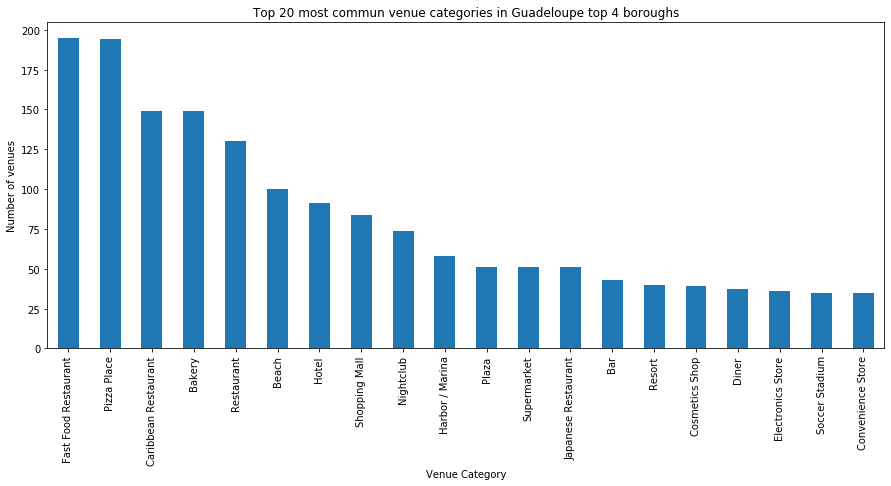

In [130]:
Top_Venue_Cat_971['Neighborhood'][0:20].plot(kind='bar', figsize=(15, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Venue Category')
plt.ylabel('Number of venues')
plt.title('Top 20 most commun venue categories in Guadeloupe top 4 boroughs')

In [132]:
Top_Neigh_by_venue_971=Guada_venues.groupby('Neighborhood').count().sort_values('Venue',ascending=False)

Let's visualize the neighborhoods with the highest number of venues

Text(0.5, 1.0, 'Top ten Guadeloupe Neighborhood per number of venues')

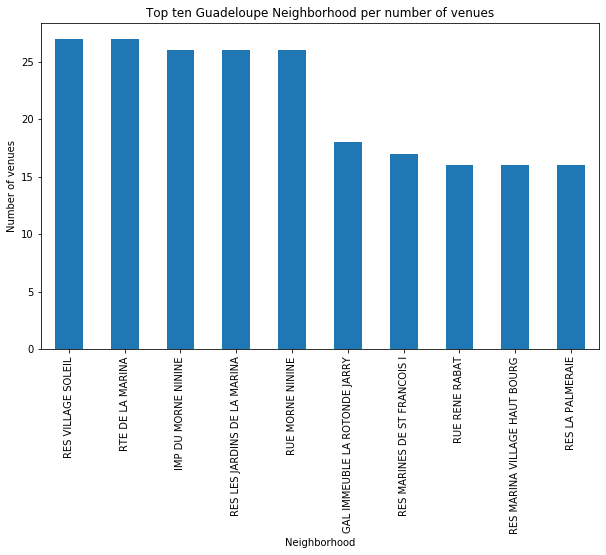

In [136]:
Top_Neigh_by_venue_971['Venue'][0:10].plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Neighborhood')
plt.ylabel('Number of venues')
plt.title('Top ten Guadeloupe Neighborhood per number of venues')

Let's create a data frame to identify the frequency of each venue category per Neighborhood

In [566]:
# one hot encoding
Guada_onehot = pd.get_dummies(Guada_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood columns back to dataframe
Guada_onehot['Neighborhood'] = Guada_venues['Neighborhood'] 
Guada_onehot['Latitude']= Guada_venues['Neighborhood Latitude']
Guada_onehot['Longitude']= Guada_venues['Neighborhood Longitude']

# calculate the frequency of each venue category
Guada_grouped = Guada_onehot.groupby('Neighborhood').mean().reset_index()


In [567]:
Guada_grouped.head()

Neighborhood  ATM  African Restaurant  Airport  Aquarium  \
0     ALL ACAJOU  0.0                 0.0      0.0       0.0   
1  ALL BAGATELLE  0.0                 0.0      0.0       0.0   
2    ALL BEL AIR  0.0                 0.0      0.0       0.0   
3    ALL BENGALI  0.0                 0.0      0.0       0.0   
4    ALL BIGUINE  0.0                 0.0      0.0       0.0   

   Arts & Crafts Store  Asian Restaurant  Astrologer  Auto Garage  \
0                  0.0               0.0         0.0          0.0   
1                  0.0               0.0         0.0          0.0   
2                  0.0               0.0         0.0          0.0   
3                  0.0               0.0         0.0          0.0   
4                  0.0               0.0         0.0          0.0   

   Auto Workshop  ...  Track Stadium  Trail  Vacation Rental  \
0            0.0  ...            0.0    0.0              0.0   
1            0.0  ...            0.0    0.0              0.0   
2            0.0  ...            0.0    0.0              0.0   
3            0.0  ...            0.0    0.0              0.0   
4            0.0  ...            0.0    0.0              0.0   

   Vegetarian / Vegan Restaurant  Video Game Store  Water Park  Wine Shop  \
0                            0.0               0.0         0.0        0.0   
1                            0.0               0.0         0.0        0.0   
2                            0.0               0.0         0.0        0.0   
3                            0.0               0.0         0.0        0.0   
4                            0.0               0.0         0.0        0.0   

   Wings Joint   Latitude  Longitude  
0          0.0  16.258545 -61.528751  
1          0.0  16.257685 -61.529815  
2          0.0  16.259055 -61.530008  
3          0.0  16.257853 -61.530014  
4          0.0  16.258569 -61.529700  

[5 rows x 151 columns]

<h4> 4.2.2 Let's explore the neighborhoods of Martinique

 Let's see how many unique categories of venues we have and see which neighborhood count the highest number of venues

In [123]:
print('There are {} uniques categories.'.format(len(Madinina_venues['Venue Category'].unique())))

There are 181 uniques categories.


In [124]:
Top_Venue_Cat_972=Madinina_venues.groupby('Venue Category').count().sort_values('Venue',ascending=False)
Top_Venue_Cat_972.head(30)

Unnamed: 0  Neighborhood  Neighborhood Latitude  \
Venue Category                                                          
Pizza Place                  454           454                    454   
Bus Stop                     331           331                    331   
Bakery                       321           321                    321   
Fast Food Restaurant         319           319                    319   
Caribbean Restaurant         207           207                    207   
Shopping Mall                176           176                    176   
Pharmacy                     165           165                    165   
Cocktail Bar                 143           143                    143   
Restaurant                   142           142                    142   
Sandwich Place               135           135                    135   
Resort                       135           135                    135   
Asian Restaurant             131           131                    131   
Snack Place                  121           121                    121   
French Restaurant            105           105                    105   
Spa                          104           104                    104   
Ice Cream Shop               103           103                    103   
Plaza                         99            99                     99   
Nightclub                     99            99                     99   
Beach                         97            97                     97   
Electronics Store             95            95                     95   
Women's Store                 92            92                     92   
Convenience Store             89            89                     89   
BBQ Joint                     88            88                     88   
Cupcake Shop                  88            88                     88   
Italian Restaurant            83            83                     83   
Hotel                         78            78                     78   
Park                          77            77                     77   
Dessert Shop                  75            75                     75   
Doner Restaurant              71            71                     71   
Bookstore                     70            70                     70   

                      Neighborhood Longitude  Venue  Venue Latitude  \
Venue Category                                                        
Pizza Place                              454    454             454   
Bus Stop                                 331    331             331   
Bakery                                   321    321             321   
Fast Food Restaurant                     319    319             319   
Caribbean Restaurant                     207    207             207   
Shopping Mall                            176    176             176   
Pharmacy                                 165    165             165   
Cocktail Bar                             143    143             143   
Restaurant                               142    142             142   
Sandwich Place                           135    135             135   
Resort                                   135    135             135   
Asian Restaurant                         131    131             131   
Snack Place                              121    121             121   
French Restaurant                        105    105             105   
Spa                                      104    104             104   
Ice Cream Shop                           103    103             103   
Plaza                                     99     99              99   
Nightclub                                 99     99              99   
Beach                                     97     97              97   
Electronics Store                         95     95              95   
Women's Store                             92     92              92   
Convenience Store                         89     89 

Let's visualize the most common venue categories of martinique

Text(0.5, 1.0, 'Top 20 most common venue categories in Martinique top 4 boroughs')

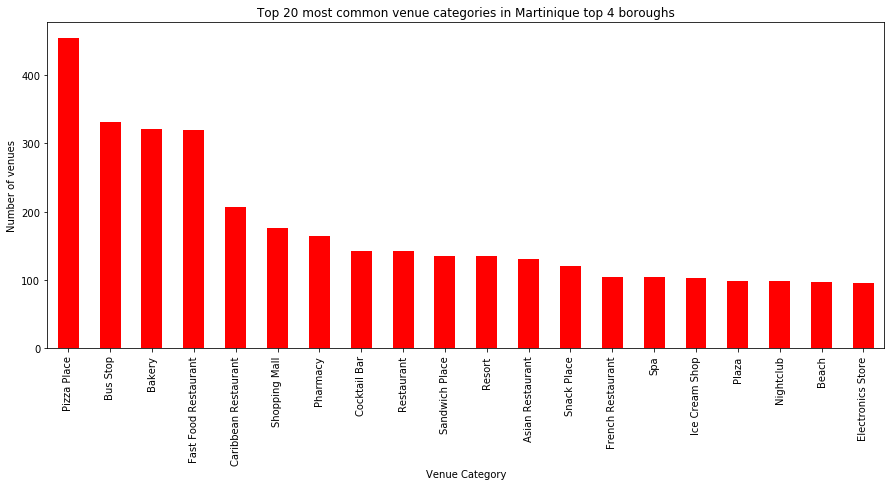

In [129]:
Top_Venue_Cat_972['Neighborhood'][0:20].plot(kind='bar', figsize=(15, 6), rot=90, color='red') # rotate the bars by 90 degrees

plt.xlabel('Venue Category')
plt.ylabel('Number of venues')
plt.title('Top 20 most common venue categories in Martinique top 4 boroughs')

In [140]:
Top_Neigh_by_venue_972=Madinina_venues.groupby('Neighborhood').count().sort_values('Venue',ascending=False)

Text(0.5, 1.0, 'Top ten Martinique Neighborhoods per number of venues')

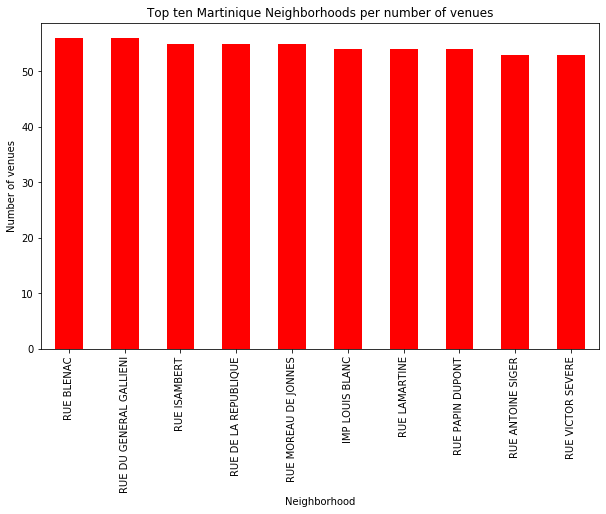

In [143]:
Top_Neigh_by_venue_972['Venue'][0:10].plot(kind='bar', figsize=(10, 6), rot=90, color='red') # rotate the bars by 90 degrees

plt.xlabel('Neighborhood')
plt.ylabel('Number of venues')
plt.title('Top ten Martinique Neighborhoods per number of venues')

Let's create a data frame to identify the frequency of each venue category per Neighborhood

In [563]:
# one hot encoding
Madinina_onehot = pd.get_dummies(Madinina_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood columns back to dataframe
Madinina_onehot['Neighborhood'] = Madinina_venues['Neighborhood'] 
Madinina_onehot['Latitude']= Madinina_venues['Neighborhood Latitude']
Madinina_onehot['Longitude']= Madinina_venues['Neighborhood Longitude']

# calculate the frequency of each venue category
Madinina_grouped = Madinina_onehot.groupby('Neighborhood').mean().reset_index()


In [564]:
Madinina_grouped.head()

Neighborhood  Accessories Store  American Restaurant  Arcade  \
0           ACAJOU                0.0                  0.0     0.0   
1      ACAJOU NORD                0.0                  0.0     0.0   
2  ACAJOU PROLONGE                0.0                  0.0     0.0   
3       ACAJOU SUD                0.0                  0.0     0.0   
4  ALL BEL HORIZON                0.0                  0.0     0.0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                  0.0               0.0                 0.0     0.000000   
1                  0.0               0.0                 0.0     0.000000   
2                  0.0               0.0                 0.0     0.000000   
3                  0.0               0.0                 0.0     0.111111   
4                  0.0               0.0                 0.0     0.000000   

   Auto Workshop  Automotive Shop  ...  Vegetarian / Vegan Restaurant  \
0            0.0              0.0  ...                            0.0   
1            0.0              0.0  ...                            0.0   
2            0.0              0.0  ...                            0.0   
3            0.0              0.0  ...                            0.0   
4            0.0              0.0  ...                            0.0   

   Video Game Store  Vietnamese Restaurant  Waterfront  Weight Loss Center  \
0               0.0                    0.0         0.0                 0.0   
1               0.0                    0.0         0.0                 0.0   
2               0.0                    0.0         0.0                 0.0   
3               0.0                    0.0         0.0                 0.0   
4               0.0                    0.0         0.0                 0.0   

   Wine Shop  Women's Store  Yoga Studio   Latitude  Longitude  
0        0.0          0.125          0.0  14.622283 -61.020986  
1        0.0          0.000          0.0  14.634680 -61.018170  
2        0.0          0.000          0.0  14.631399 -61.021165  
3        0.0          0.000          0.0  14.619397 -61.013670  
4        0.0          0.000          0.0  14.633019 -61.118043  

[5 rows x 183 columns]

<a id='item5'></a>

<h2> 5. Cluster Neighborhoods

<h3> 5.1 Let first analyse the island separately and run k-means clustering for Guadeloupe and Martinique

<h4> 5.1.1 Clustering for Guadeloupe

In [561]:
# set number of clusters
kclusters = 5
Guada_grouped_clustering = Guada_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Guada_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

Let's add the clusters to the dataframe

In [568]:
# add clustering labels
Guada_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [569]:
Guada_grouped.head()

Cluster Labels   Neighborhood  ATM  African Restaurant  Airport  Aquarium  \
0               1     ALL ACAJOU  0.0                 0.0      0.0       0.0   
1               1  ALL BAGATELLE  0.0                 0.0      0.0       0.0   
2               1    ALL BEL AIR  0.0                 0.0      0.0       0.0   
3               1    ALL BENGALI  0.0                 0.0      0.0       0.0   
4               1    ALL BIGUINE  0.0                 0.0      0.0       0.0   

   Arts & Crafts Store  Asian Restaurant  Astrologer  Auto Garage  ...  \
0                  0.0               0.0         0.0          0.0  ...   
1                  0.0               0.0         0.0          0.0  ...   
2                  0.0               0.0         0.0          0.0  ...   
3                  0.0               0.0         0.0          0.0  ...   
4                  0.0               0.0         0.0          0.0  ...   

   Track Stadium  Trail  Vacation Rental  Vegetarian / Vegan Restaurant  \
0            0.0    0.0              0.0                            0.0   
1            0.0    0.0              0.0                            0.0   
2            0.0    0.0              0.0                            0.0   
3            0.0    0.0              0.0                            0.0   
4            0.0    0.0              0.0                            0.0   

   Video Game Store  Water Park  Wine Shop  Wings Joint   Latitude  Longitude  
0               0.0         0.0        0.0          0.0  16.258545 -61.528751  
1               0.0         0.0        0.0          0.0  16.257685 -61.529815  
2               0.0         0.0        0.0          0.0  16.259055 -61.530008  
3               0.0         0.0        0.0          0.0  16.257853 -61.530014  
4               0.0         0.0        0.0          0.0  16.258569 -61.529700  

[5 rows x 152 columns]

In [570]:
Guada_grouped.groupby('Cluster Labels').count()

Neighborhood  ATM  African Restaurant  Airport  Aquarium  \
Cluster Labels                                                             
0                         44   44                  44       44        44   
1                        135  135                 135      135       135   
2                        233  233                 233      233       233   
3                         72   72                  72       72        72   
4                         36   36                  36       36        36   

                Arts & Crafts Store  Asian Restaurant  Astrologer  \
Cluster Labels                                                      
0                                44                44          44   
1                               135               135         135   
2                               233               233         233   
3                                72                72          72   
4                                36                36          36   

                Auto Garage  Auto Workshop  ...  Track Stadium  Trail  \
Cluster Labels                              ...                         
0                        44             44  ...             44     44   
1                       135            135  ...            135    135   
2                       233            233  ...            233    233   
3                        72             72  ...             72     72   
4                        36             36  ...             36     36   

                Vacation Rental  Vegetarian / Vegan Restaurant  \
Cluster Labels                                                   
0                            44                             44   
1                           135                            135   
2                           233                            233   
3                            72                             72   
4                            36                             36   

                Video Game Store  Water Park  Wine Shop  Wings Joint  \
Cluster Labels                                                         
0                             44          44         44           44   
1                            135         135        135          135   
2                            233         233        233          233   
3                             72          72         72           72   
4                             36          36         36           36   

                Latitude  Longitude  
Cluster Labels                       
0                     44         44  
1                    135        135  
2                    233        233  
3                     72         72  
4                     36         36  

[5 rows x 151 columns]

Let's visualize Guadeloupe Clusters

In [571]:
# create map
map_clusters_971 = folium.Map(location=[latitude_971, longitude_971], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Guada_grouped['Latitude'], Guada_grouped['Longitude'], Guada_grouped['Neighborhood'], Guada_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters_971)
       
map_clusters_971

<h4> 5.1.2 Clustering for Martinique

In [572]:
# set number of clusters
kclusters = 5
Madinina_grouped_clustering = Madinina_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Madinina_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 0, 1, 1, 1, 0, 4, 1], dtype=int32)

Let's add the clusters to the dataframe

In [573]:
# add clustering labels
Madinina_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [574]:
Madinina_grouped.head()

Cluster Labels     Neighborhood  Accessories Store  American Restaurant  \
0               1           ACAJOU                0.0                  0.0   
1               1      ACAJOU NORD                0.0                  0.0   
2               1  ACAJOU PROLONGE                0.0                  0.0   
3               0       ACAJOU SUD                0.0                  0.0   
4               1  ALL BEL HORIZON                0.0                  0.0   

   Arcade  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0     0.0                  0.0               0.0                 0.0   
1     0.0                  0.0               0.0                 0.0   
2     0.0                  0.0               0.0                 0.0   
3     0.0                  0.0               0.0                 0.0   
4     0.0                  0.0               0.0                 0.0   

   Auto Garage  Auto Workshop  ...  Vegetarian / Vegan Restaurant  \
0     0.000000            0.0  ...                            0.0   
1     0.000000            0.0  ...                            0.0   
2     0.000000            0.0  ...                            0.0   
3     0.111111            0.0  ...                            0.0   
4     0.000000            0.0  ...                            0.0   

   Video Game Store  Vietnamese Restaurant  Waterfront  Weight Loss Center  \
0               0.0                    0.0         0.0                 0.0   
1               0.0                    0.0         0.0                 0.0   
2               0.0                    0.0         0.0                 0.0   
3               0.0                    0.0         0.0                 0.0   
4               0.0                    0.0         0.0                 0.0   

   Wine Shop  Women's Store  Yoga Studio   Latitude  Longitude  
0        0.0          0.125          0.0  14.622283 -61.020986  
1        0.0          0.000          0.0  14.634680 -61.018170  
2        0.0          0.000          0.0  14.631399 -61.021165  
3        0.0          0.000          0.0  14.619397 -61.013670  
4        0.0          0.000          0.0  14.633019 -61.118043  

[5 rows x 184 columns]

In [575]:
Madinina_grouped.groupby('Cluster Labels').count()

Neighborhood  Accessories Store  American Restaurant  Arcade  \
Cluster Labels                                                                 
0                         89                 89                   89      89   
1                        435                435                  435     435   
2                         64                 64                   64      64   
3                        165                165                  165     165   
4                         43                 43                   43      43   

                Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
Cluster Labels                                                              
0                                89                89                  89   
1                               435               435                 435   
2                                64                64                  64   
3                               165               165                 165   
4                                43                43                  43   

                Auto Garage  Auto Workshop  Automotive Shop  ...  \
Cluster Labels                                               ...   
0                        89             89               89  ...   
1                       435            435              435  ...   
2                        64             64               64  ...   
3                       165            165              165  ...   
4                        43             43               43  ...   

                Vegetarian / Vegan Restaurant  Video Game Store  \
Cluster Labels                                                    
0                                          89                89   
1                                         435               435   
2                                          64                64   
3                                         165               165   
4                                          43                43   

                Vietnamese Restaurant  Waterfront  Weight Loss Center  \
Cluster Labels                                                          
0                                  89          89                  89   
1                                 435         435                 435   
2                                  64          64                  64   
3                                 165         165                 165   
4                                  43          43                  43   

                Wine Shop  Women's Store  Yoga Studio  Latitude  Longitude  
Cluster Labels                                                              
0                      89             89           89        89         89  
1                     435            435          435       435        435  
2                      64             64           64        64         64  
3                     165            165          165       165        165  
4                      43             43           43        43         43  

[5 rows x 183 columns]

Let's visualize Madinina Clusters

In [576]:
# create map
map_clusters_972 = folium.Map(location=[latitude_972, longitude_972], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Madinina_grouped['Latitude'], Madinina_grouped['Longitude'], Madinina_grouped['Neighborhood'], Madinina_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters_972)
       
map_clusters_972

<h3> 5.2 Let's now combine the venues for Martinique and Guadeloupe and identify similarities in the neighborhoods of the two Islands

<h4> 5.2.1 Let's have a combined dataframe with the venues per neighberhood of the two islands

In [384]:
Madinina_venues['Dept_code']=list(Madinina_venues.shape[0]*'2')

In [385]:
Guada_venues['Dept_code']=list(Guada_venues.shape[0]*'1')

In [386]:
Madinina_Guada_venues=Madinina_venues.append(Guada_venues)

In [387]:
Madinina_Guada_venues.shape

(9863, 9)

In [388]:
Madinina_Guada_venues.columns

Index(['Unnamed: 0', 'Neighborhood', 'Neighborhood Latitude',
       'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude',
       'Venue Category', 'Dept_code'],
      dtype='object')

In [389]:
Madinina_Guada_venues.drop('Unnamed: 0',1,inplace=True)

In [390]:
Madinina_Guada_venues.index=range(0,9863)

In [391]:
Madinina_Guada_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  ZAC ETANG Z ABRICOT              14.598339              -61.043747   
1  ZAC ETANG Z ABRICOT              14.598339              -61.043747   
2  ZAC ETANG Z ABRICOT              14.598339              -61.043747   
3  ZAC ETANG Z ABRICOT              14.598339              -61.043747   
4  ZAC ETANG Z ABRICOT              14.598339              -61.043747   

                            Venue  Venue Latitude  Venue Longitude  \
0                        Le Cloud       14.600633       -61.045503   
1  Centre International de Séjour       14.602527       -61.043074   
2        Marina L'Etang Z'Abricot       14.597984       -61.043323   
3     Arrêt Etang Z Abricot [211]       14.602185       -61.042550   
4                COLAS Martinique       14.598649       -61.048076   

               Venue Category Dept_code  
0                      Lounge         2  
1                       Hotel         2  
2                        Pier         2  
3                    Bus Stop         2  
4  Construction & Landscaping         2

<h4> 5.2.2 Let's quickly analyse our combined dataframe

 Let's see how many unique categories of venues we have and see which neighborhood count the highest number of venues

In [392]:
print('There are {} uniques categories.'.format(len(Madinina_Guada_venues['Venue Category'].unique())))

There are 222 uniques categories.


In [393]:
Top_Venue_Cat=Madinina_Guada_venues.groupby('Venue Category').count().sort_values('Venue',ascending=False)
Top_Venue_Cat.head(20)

Neighborhood  Neighborhood Latitude  \
Venue Category                                              
Pizza Place                    648                    648   
Fast Food Restaurant           514                    514   
Bakery                         470                    470   
Caribbean Restaurant           356                    356   
Bus Stop                       332                    332   
Restaurant                     272                    272   
Shopping Mall                  260                    260   
Beach                          197                    197   
Pharmacy                       187                    187   
Resort                         175                    175   
Nightclub                      173                    173   
Hotel                          169                    169   
Cocktail Bar                   168                    168   
Asian Restaurant               162                    162   
Plaza                          150                    150   
Sandwich Place                 137                    137   
Electronics Store              131                    131   
Spa                            130                    130   
French Restaurant              128                    128   
Convenience Store              124                    124   

                      Neighborhood Longitude  Venue  Venue Latitude  \
Venue Category                                                        
Pizza Place                              648    648             648   
Fast Food Restaurant                     514    514             514   
Bakery                                   470    470             470   
Caribbean Restaurant                     356    356             356   
Bus Stop                                 332    332             332   
Restaurant                               272    272             272   
Shopping Mall                            260    260             260   
Beach                                    197    197             197   
Pharmacy                                 187    187             187   
Resort                                   175    175             175   
Nightclub                                173    173             173   
Hotel                                    169    169             169   
Cocktail Bar                             168    168             168   
Asian Restaurant                         162    162             162   
Plaza                                    150    150             150   
Sandwich Place                           137    137             137   
Electronics Store                        131    131             131   
Spa                                      130    130             130   
French Restaurant                        128    128             128   
Convenience Store                        124    124             124   

                      Venue Longitude  Dept_code  
Venue Category                                    
Pizza Place                       648        648  
Fast Food Restaurant              514        514  
Bakery                            470        470  
Caribbean Restaurant              356        356  
Bus Stop                          332        332  
Restaurant                        272        272  
Shopping Mall                     260        260  
Beach                             197        197  
Pharmacy                          187        187  
Resort                            175        175  
Nightclub                         173        173  
Hotel                             169        169  
Cocktail Bar                      168        168  
Asian Restaurant                  162        162  
Plaza                             150        150  
Sandwich Place                    137        137  
Electronics Store                 131        131  
Spa                               130        130  
French Restaurant                 128        128  
Convenience Store                 124        

Text(0.5, 1.0, 'Top twenty most common venue categories in top 4 boroughs of sister islands')

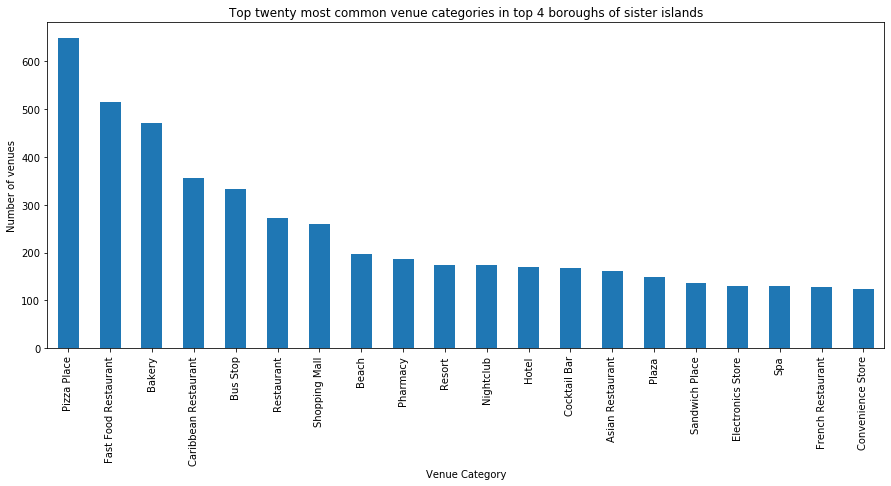

In [394]:
Top_Venue_Cat['Neighborhood'][0:20].plot(kind='bar', figsize=(15, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Venue Category')
plt.ylabel('Number of venues')
plt.title('Top twenty most common venue categories in top 4 boroughs of sister islands')

Let's check if some Neighborhoods of Martinique and Guadeloupe have the same name

In [395]:
Madinina_Guada_venues.groupby('Neighborhood').count().sort_values('Venue',ascending=False).shape

(1311, 7)

There are only 1311 Neighborhood when we group the data instead of 1316 which mean we have 5 neighborhood with duplicated names

In [396]:
Madinina_Guada_venues['Dept_code']=Madinina_Guada_venues['Dept_code'].astype(int)

In [397]:
Madinina_guada_dupnei=Madinina_Guada_venues.groupby('Neighborhood').mean()
Duplicate_neighberhood0=Madinina_guada_dupnei[Madinina_guada_dupnei['Dept_code']!=1].sort_values('Dept_code')
Duplicate_neighberhood=Duplicate_neighberhood0[Duplicate_neighberhood0['Dept_code']!=2]
Duplicate_neighberhood

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
RUE PIERRE ET MARIE CURIE              15.621529              -61.372430   
RUE DE LA FRATERNITE                   15.117255              -61.143081   
RUE DES AMANDIERS                      14.963117              -61.105614   
RUE DES HIBISCUS                       14.896252              -61.145809   
RUE DES NENUPHARS                      14.896361              -61.076820   

                           Venue Latitude  Venue Longitude  Dept_code  
Neighborhood                                                           
RUE PIERRE ET MARIE CURIE       15.620866       -61.372173   1.380952  
RUE DE LA FRATERNITE            15.119787       -61.142438   1.692308  
RUE DES AMANDIERS               14.961844       -61.106322   1.789474  
RUE DES HIBISCUS                14.896297       -61.146856   1.800000  
RUE DES NENUPHARS               14.895193       -61.077629   1.833333

In [432]:
Df_Dup1=Madinina_Guada_venues[Madinina_Guada_venues['Neighborhood']=='RUE PIERRE ET MARIE CURIE']
Df_Dup2=Madinina_Guada_venues[Madinina_Guada_venues['Neighborhood']=='RUE DE LA FRATERNITE']
Df_Dup3=Madinina_Guada_venues[Madinina_Guada_venues['Neighborhood']=='RUE DES AMANDIERS']
Df_Dup4=Madinina_Guada_venues[Madinina_Guada_venues['Neighborhood']=='RUE DES HIBISCUS']
Df_Dup5=Madinina_Guada_venues[Madinina_Guada_venues['Neighborhood']=='RUE DES NENUPHARS']

In [433]:
Df_Dup=Df_Dup1.append(Df_Dup2).append(Df_Dup3).append(Df_Dup4).append(Df_Dup5)

In [434]:
Df_Dup=Df_Dup.reset_index()

In [435]:
Df_Dup.columns=['initial_index', 'Neighborhood', 'Neighborhood Latitude',
       'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude',
       'Venue Category', 'Dept_code']

In [444]:
Df_Dup1.tail(21)

Neighborhood  Neighborhood Latitude  \
571   RUE PIERRE ET MARIE CURIE              14.610676   
572   RUE PIERRE ET MARIE CURIE              14.610676   
573   RUE PIERRE ET MARIE CURIE              14.610676   
574   RUE PIERRE ET MARIE CURIE              14.610676   
575   RUE PIERRE ET MARIE CURIE              14.610676   
576   RUE PIERRE ET MARIE CURIE              14.610676   
577   RUE PIERRE ET MARIE CURIE              14.610676   
578   RUE PIERRE ET MARIE CURIE              14.610676   
7363  RUE PIERRE ET MARIE CURIE              16.243593   
7364  RUE PIERRE ET MARIE CURIE              16.243593   
7365  RUE PIERRE ET MARIE CURIE              16.243593   
7366  RUE PIERRE ET MARIE CURIE              16.243593   
7367  RUE PIERRE ET MARIE CURIE              16.243593   
7368  RUE PIERRE ET MARIE CURIE              16.243593   
7369  RUE PIERRE ET MARIE CURIE              16.243593   
7370  RUE PIERRE ET MARIE CURIE              16.243593   
7371  RUE PIERRE ET MARIE CURIE              16.243593   
7372  RUE PIERRE ET MARIE CURIE              16.243593   
7373  RUE PIERRE ET MARIE CURIE              16.243593   
7374  RUE PIERRE ET MARIE CURIE              16.243593   
7375  RUE PIERRE ET MARIE CURIE              16.243593   

      Neighborhood Longitude                              Venue  \
571               -61.072898                           Timeless   
572               -61.072898                    Au lèche doigts   
573               -61.072898                      QG Lounge Bar   
574               -61.072898  Grand Carbet du Parc Aimé Césaire   
575               -61.072898                     Croc'inn Pizza   
576               -61.072898                           Le Capri   
577               -61.072898         Parc Cultural Aimé Cesaire   
578               -61.072898                     Snack Hoï-Kong   
7363              -61.556758                 Fitness Park Jarry   
7364              -61.556758                           Toyotomi   
7365              -61.556758                        Mezzo Mezzo   
7366              -61.556758                  Gwad Bowling Pool   
7367              -61.556758                          Kama Club   
7368              -61.556758                        Bagel Juice   
7369              -61.556758                Le Village de jarry   
7370              -61.556758                    Boutique Orange   
7371              -61.556758                             Orange   
7372              -61.556758   La Vie Claire Jarry Baie Mahault   
7373              -61.556758                               Nove   
7374              -61.556758                              Hertz   
7375              -61.556758                          Pizza Hot   

      Venue Latitude  Venue Longitude       Venue Category  Dept_code  
571        14.610742       -61.073150            Nightclub          2  
572        14.610649       -61.071015         Dessert Shop          2  
573        14.606253       -61.072717         Cocktail Bar          2  
574        14.610105       -61.072556         Concert Hall          2  
575        14.613935       -61.072284          Pizza Place          2  
576        14.610981       -61.072112          Pizza Place          2  
577        14.608926       -61.072294                 Park          2  
578        14.613173       -61.072011          Snack Place          2  
7363       16.243401       -61.558340                  Gym          1  
7364       16.242615       -61.558335  Japanese Restaurant          1  
7365       16.243901       -61.560669                Diner          1  
7366       16.242874       -61.553176        Bowling Alley          1  
7367       16.240771       -61.553980            Nightclub          1  
7368       16.241971       -61.555044           Food Court          1  
7369       16.240475       -61.554537        Shopping Mall          1  
7370       16.242658       -61.557669    Mobile Phone Shop          1  
7371       16.242521       -61.557544    Mo

In [437]:
Df_Dup0=Df_Dup.copy()
Madinina_Guada_venues2=Madinina_Guada_venues.copy()

In [424]:
Madinina_Guada_venues['Dept_code'].loc[0]
Madinina_Guada_venues2['Neighborhood'].loc[9313]

'RUE DES NENUPHARS_dept1'

In [447]:
for i in range(0,Df_Dup0.shape[0]):
    j=Df_Dup0['initial_index'][i]
    if Madinina_Guada_venues2['Dept_code'].loc[j]==1:
        Madinina_Guada_venues2['Neighborhood'].loc[j]=Madinina_Guada_venues2['Neighborhood'].loc[j]+'_dept1'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [464]:
Madinina_Guada_venues2.groupby('Neighborhood').count().sort_values('Venue',ascending=False).shape

(1316, 7)

<h4> 5.2.3 Let's create a data frame to identify the frequency of each venue category per Neighborhood

In [523]:
# one hot encoding
Madinina_Guada_onehot = pd.get_dummies(Madinina_Guada_venues2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood columns back to dataframe
Madinina_Guada_onehot['Neighborhood'] = Madinina_Guada_venues2['Neighborhood'] 
Madinina_Guada_onehot['Neighborhood Latitude']= Madinina_Guada_venues2['Neighborhood Latitude']
Madinina_Guada_onehot['Neighborhood Longitude']= Madinina_Guada_venues2['Neighborhood Longitude']
Madinina_Guada_onehot['Dept_code']= Madinina_Guada_venues2['Dept_code']
# calculate the frequency of each venue category
Madinina_Guada_grouped = Madinina_Guada_onehot.groupby('Neighborhood').mean().reset_index()


In [524]:
Madinina_Guada_grouped.head()

Neighborhood  ATM  Accessories Store  African Restaurant  Airport  \
0           ACAJOU  0.0                0.0                 0.0      0.0   
1      ACAJOU NORD  0.0                0.0                 0.0      0.0   
2  ACAJOU PROLONGE  0.0                0.0                 0.0      0.0   
3       ACAJOU SUD  0.0                0.0                 0.0      0.0   
4       ALL ACAJOU  0.0                0.0                 0.0      0.0   

   American Restaurant  Aquarium  Arcade  Arts & Crafts Store  \
0                  0.0       0.0     0.0                  0.0   
1                  0.0       0.0     0.0                  0.0   
2                  0.0       0.0     0.0                  0.0   
3                  0.0       0.0     0.0                  0.0   
4                  0.0       0.0     0.0                  0.0   

   Asian Restaurant  ...  Water Park  Waterfront  Weight Loss Center  \
0               0.0  ...         0.0         0.0                 0.0   
1               0.0  ...         0.0         0.0                 0.0   
2               0.0  ...         0.0         0.0                 0.0   
3               0.0  ...         0.0         0.0                 0.0   
4               0.0  ...         0.0         0.0                 0.0   

   Wine Shop  Wings Joint  Women's Store  Yoga Studio  Neighborhood Latitude  \
0        0.0          0.0          0.125          0.0              14.622283   
1        0.0          0.0          0.000          0.0              14.634680   
2        0.0          0.0          0.000          0.0              14.631399   
3        0.0          0.0          0.000          0.0              14.619397   
4        0.0          0.0          0.000          0.0              16.258545   

   Neighborhood Longitude  Dept_code  
0              -61.020986          2  
1              -61.018170          2  
2              -61.021165          2  
3              -61.013670          2  
4              -61.528751          1  

[5 rows x 225 columns]

<h4> 5.2.4 Clustering our combined dataframe

In [467]:
# set number of clusters
kclusters = 5
Madinina_Guada_grouped_clustering = Madinina_Guada_grouped.drop('Neighborhood', 1).drop('Neighborhood Latitude',1).drop('Neighborhood Longitude',1).drop('Dept_code',1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Madinina_Guada_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 4, 2, 2, 2, 1, 2, 2], dtype=int32)

In [525]:
# add clustering labels
Madinina_Guada_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [526]:
Madinina_Guada_grouped.shape

(1316, 226)

Let's see the number of neighborhood per cluster

In [470]:
Madinina_Guada_grouped.groupby('Cluster Labels').count()[['Neighborhood']]

Neighborhood
Cluster Labels              
0                        148
1                        706
2                        260
3                         65
4                        137

let'see the composition of clusters

In [540]:
Compo_cluster=Madinina_Guada_grouped.groupby('Cluster Labels').mean()[['Dept_code']]
Compo_cluster['% of Martinique']=((Compo_cluster['Dept_code']-1)*100).round(2)
Compo_cluster['% of Guadeloupe']=((1-(Compo_cluster['Dept_code']-1))*100).round(2)
Compo_cluster.drop('Dept_code',1)

% of Martinique  % of Guadeloupe
Cluster Labels                                  
0                         39.19            60.81
1                         59.77            40.23
2                         63.85            36.15
3                         98.46             1.54
4                         62.77            37.23

Let's visualize Clusters

In [476]:
latitude=(latitude_971+latitude_972)/2
longitude=(longitude_971+longitude_972)/2

# create map
map_clusters_sis_islands = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Madinina_Guada_grouped['Neighborhood Latitude'], Madinina_Guada_grouped['Neighborhood Longitude'], Madinina_Guada_grouped['Neighborhood'], Madinina_Guada_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters_sis_islands)
       
map_clusters_sis_islands

<a id='item6'></a>

<h2> 6. Examine clusters

<h3>6.1  Let's create a dataframe to see the most common venues in each cluster

In [490]:
Madinina_Guada_grouped2 = Madinina_Guada_grouped.drop('Neighborhood Latitude',1).drop('Neighborhood Longitude',1).drop('Dept_code',1)

In [491]:
Madinina_Guada_grouped2.head()

Cluster Labels     Neighborhood  ATM  Accessories Store  \
0               1           ACAJOU  0.0                0.0   
1               1      ACAJOU NORD  0.0                0.0   
2               1  ACAJOU PROLONGE  0.0                0.0   
3               4       ACAJOU SUD  0.0                0.0   
4               2       ALL ACAJOU  0.0                0.0   

   African Restaurant  Airport  American Restaurant  Aquarium  Arcade  \
0                 0.0      0.0                  0.0       0.0     0.0   
1                 0.0      0.0                  0.0       0.0     0.0   
2                 0.0      0.0                  0.0       0.0     0.0   
3                 0.0      0.0                  0.0       0.0     0.0   
4                 0.0      0.0                  0.0       0.0     0.0   

   Arts & Crafts Store  ...  Vegetarian / Vegan Restaurant  Video Game Store  \
0                  0.0  ...                            0.0               0.0   
1                  0.0  ...                            0.0               0.0   
2                  0.0  ...                            0.0               0.0   
3                  0.0  ...                            0.0               0.0   
4                  0.0  ...                            0.0               0.0   

   Vietnamese Restaurant  Water Park  Waterfront  Weight Loss Center  \
0                    0.0         0.0         0.0                 0.0   
1                    0.0         0.0         0.0                 0.0   
2                    0.0         0.0         0.0                 0.0   
3                    0.0         0.0         0.0                 0.0   
4                    0.0         0.0         0.0                 0.0   

   Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0        0.0          0.0          0.125          0.0  
1        0.0          0.0          0.000          0.0  
2        0.0          0.0          0.000          0.0  
3        0.0          0.0          0.000          0.0  
4        0.0          0.0          0.000          0.0  

[5 rows x 223 columns]

In [492]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [493]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood','Cluster Labels']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))



In [494]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Madinina_Guada_grouped2['Neighborhood']
neighborhoods_venues_sorted['Cluster Labels']=Madinina_Guada_grouped2['Cluster Labels']



In [495]:
for ind in np.arange(Madinina_Guada_grouped2.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(Madinina_Guada_grouped2.iloc[ind, 1:], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood  Cluster Labels   1st Most Common Venue  \
0           ACAJOU               1          Clothing Store   
1      ACAJOU NORD               1                   Plaza   
2  ACAJOU PROLONGE               1              Hobby Shop   
3       ACAJOU SUD               4  Furniture / Home Store   
4       ALL ACAJOU               2             Pizza Place   

  2nd Most Common Venue 3rd Most Common Venue       4th Most Common Venue  \
0         Women's Store     Mobile Phone Shop        Fast Food Restaurant   
1            Donut Shop           Flea Market  Financial or Legal Service   
2            Donut Shop           Flea Market  Financial or Legal Service   
3                Bakery     Electronics Store                  Baby Store   
4  Fast Food Restaurant     Martial Arts Dojo                       Plaza   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0        Cosmetics Shop           Pizza Place         Jewelry Store   
1           Film Studio  Fast Food Restaurant        Farmers Market   
2           Film Studio  Fast Food Restaurant        Farmers Market   
3            Steakhouse           Auto Garage           Yoga Studio   
4          Cupcake Shop           Dry Cleaner           Flea Market   

  8th Most Common Venue       9th Most Common Venue  \
0      Department Store              Sandwich Place   
1                  Farm                 Fabric Shop   
2                  Farm                 Fabric Shop   
3                  Food                 Flea Market   
4        Cosmetics Shop  Financial or Legal Service   

       10th Most Common Venue  
0               Shopping Mall  
1               Event Service  
2               Event Service  
3  Financial or Legal Service  
4                 Film Studio

<h3>6.1  Let's analyze each clusters and see what their caracteritics are

In [496]:
Cluster_0_1st_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==0].groupby('1st Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [497]:
Cluster_0_2nd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==0].groupby('2nd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [498]:
Cluster_0_3rd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==0].groupby('3rd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [499]:
Cluster_0_4th_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==0].groupby('4th Most Common Venue').count().sort_values('Neighborhood', ascending=False)

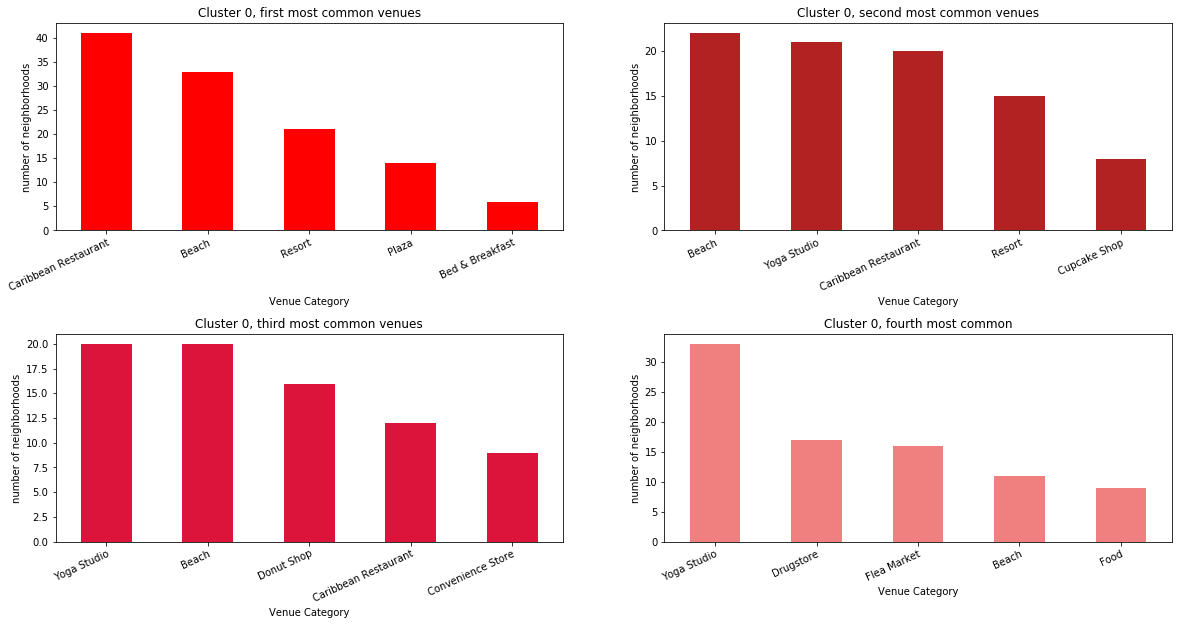

In [549]:
fig = plt.figure(figsize=(20, 20)) # create figure
fig.subplots_adjust(bottom=0.1)
fig.subplots_adjust(top=1,hspace=0.5)

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4

# Subplot 1: 
Cluster_0_1st_mc['Neighborhood'][0:5].plot(kind='bar', color='red', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Cluster 0, first most common venues')
ax0.set_ylabel('number of neighborhoods')
ax0.set_xlabel('Venue Category')

plt.setp(ax0.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")# Rotate the tick labels and set their alignment.

# Subplot 2: 
Cluster_0_2nd_mc['Neighborhood'][0:5].plot(kind='bar',color='firebrick', figsize=(20, 8), ax=ax1) # add to subplot 2
ax1.set_title ('Cluster 0, second most common venues')
ax1.set_ylabel('number of neighborhoods')
ax1.set_xlabel('Venue Category')
plt.setp(ax1.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")

# Subplot 3: 
Cluster_0_3rd_mc['Neighborhood'][0:5].plot(kind='bar',color='crimson', figsize=(20, 8), ax=ax2) # add to subplot 3
ax2.set_title ('Cluster 0, third most common venues')
ax2.set_ylabel('number of neighborhoods')
ax2.set_xlabel('Venue Category')
plt.setp(ax2.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")


# Subplot 4: 
Cluster_0_4th_mc['Neighborhood'][0:5].plot(kind='bar',color='lightcoral', figsize=(20, 8), ax=ax3) # add to subplot 3
ax3.set_title ('Cluster 0, fourth most common')
ax3.set_ylabel('number of neighborhoods')
ax3.set_xlabel('Venue Category')
plt.setp(ax3.get_xticklabels(), rotation=25, ha="right", rotation_mode="anchor")

plt.show()

In [501]:
Cluster_1_1st_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==1].groupby('1st Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [502]:
Cluster_1_2nd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==1].groupby('2nd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [503]:
Cluster_1_3rd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==1].groupby('3rd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [504]:
Cluster_1_4th_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==1].groupby('4th Most Common Venue').count().sort_values('Neighborhood', ascending=False)

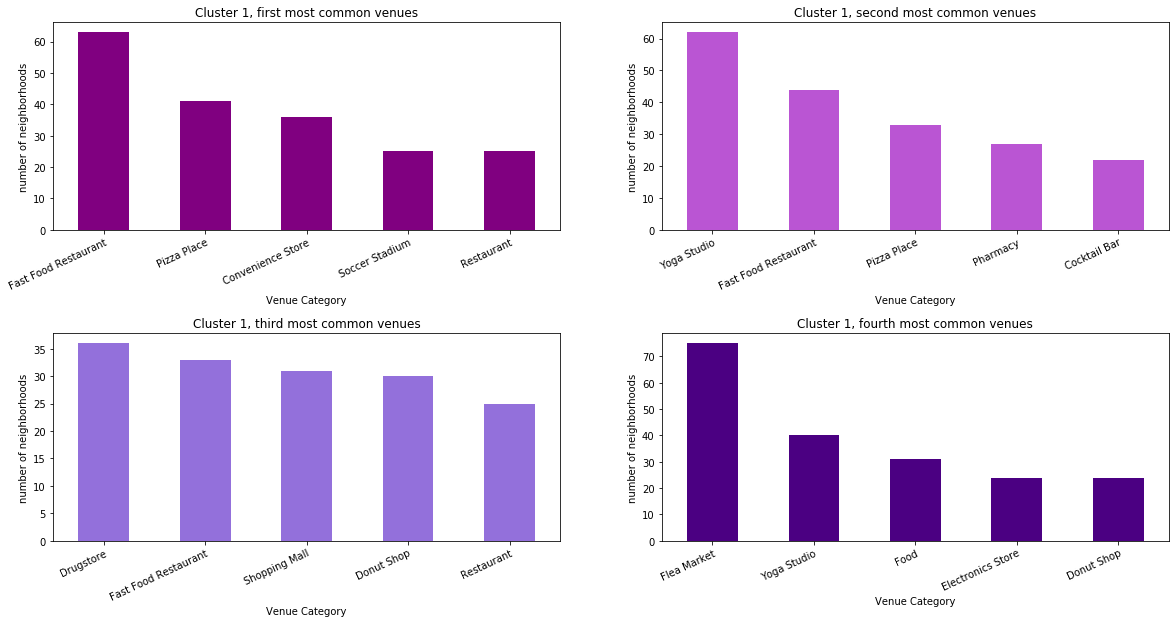

In [550]:
fig1 = plt.figure(figsize=(20, 20)) # create figure
fig1.subplots_adjust(bottom=0.1)
fig1.subplots_adjust(top=1,hspace=0.5)

ax01 = fig1.add_subplot(2, 2, 1) # add subplot 1 
ax11 = fig1.add_subplot(2, 2, 2) # add subplot 2 
ax21 = fig1.add_subplot(2, 2, 3) # add subplot 3 
ax31 = fig1.add_subplot(2, 2, 4) # add subplot 4

# Subplot 1: 
Cluster_1_1st_mc['Neighborhood'][0:5].plot(kind='bar', color='purple', figsize=(20, 8), ax=ax01) # add to subplot 1
ax01.set_title('Cluster 1, first most common venues')
ax01.set_ylabel('number of neighborhoods')
ax01.set_xlabel('Venue Category')

plt.setp(ax01.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")# Rotate the tick labels and set their alignment.

# Subplot 2: 
Cluster_1_2nd_mc['Neighborhood'][0:5].plot(kind='bar',color='mediumorchid', figsize=(20, 8), ax=ax11) # add to subplot 2
ax11.set_title ('Cluster 1, second most common venues')
ax11.set_ylabel('number of neighborhoods')
ax11.set_xlabel('Venue Category')
plt.setp(ax11.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")

# Subplot 3: 
Cluster_1_3rd_mc['Neighborhood'][0:5].plot(kind='bar',color='mediumpurple', figsize=(20, 8), ax=ax21) # add to subplot 3
ax21.set_title ('Cluster 1, third most common venues')
ax21.set_ylabel('number of neighborhoods')
ax21.set_xlabel('Venue Category')
plt.setp(ax21.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")


# Subplot 4: 
Cluster_1_4th_mc['Neighborhood'][0:5].plot(kind='bar',color='indigo', figsize=(20, 8), ax=ax31) # add to subplot 3
ax31.set_title ('Cluster 1, fourth most common venues')
ax31.set_ylabel('number of neighborhoods')
ax31.set_xlabel('Venue Category')
plt.setp(ax31.get_xticklabels(), rotation=25, ha="right", rotation_mode="anchor")

plt.show()

In [506]:
Cluster_2_1st_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==2].groupby('1st Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [507]:
Cluster_2_2nd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==2].groupby('2nd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [508]:
Cluster_2_3rd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==2].groupby('3rd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [509]:
Cluster_2_4th_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==2].groupby('4th Most Common Venue').count().sort_values('Neighborhood', ascending=False)

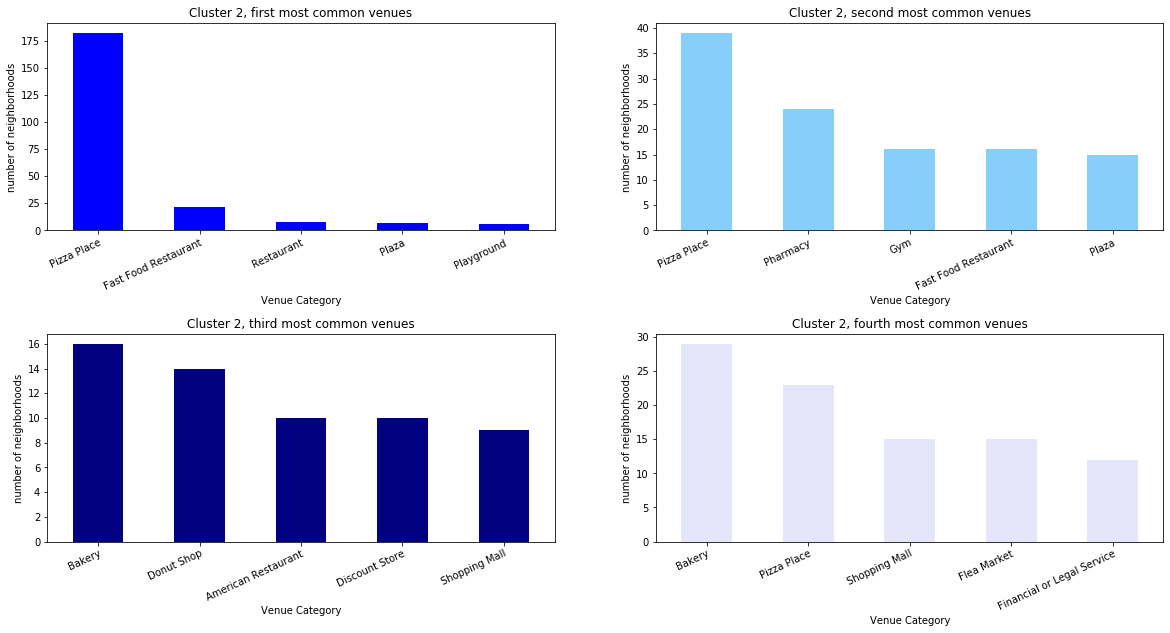

In [552]:
fig2 = plt.figure(figsize=(20, 20)) # create figure
fig2.subplots_adjust(bottom=0.1)
fig2.subplots_adjust(top=1,hspace=0.5)

ax02 = fig2.add_subplot(2, 2, 1) # add subplot 1 
ax12 = fig2.add_subplot(2, 2, 2) # add subplot 2 
ax22 = fig2.add_subplot(2, 2, 3) # add subplot 3 
ax32 = fig2.add_subplot(2, 2, 4) # add subplot 4

# Subplot 1: 
Cluster_2_1st_mc['Neighborhood'][0:5].plot(kind='bar', color='blue', figsize=(20, 8), ax=ax02) # add to subplot 1
ax02.set_title('Cluster 2, first most common venues')
ax02.set_ylabel('number of neighborhoods')
ax02.set_xlabel('Venue Category')

plt.setp(ax02.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")# Rotate the tick labels and set their alignment.

# Subplot 2: 
Cluster_2_2nd_mc['Neighborhood'][0:5].plot(kind='bar',color='lightskyblue', figsize=(20, 8), ax=ax12) # add to subplot 2
ax12.set_title ('Cluster 2, second most common venues')
ax12.set_ylabel('number of neighborhoods')
ax12.set_xlabel('Venue Category')
plt.setp(ax12.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")

# Subplot 3: 
Cluster_2_3rd_mc['Neighborhood'][0:5].plot(kind='bar',color='navy', figsize=(20, 8), ax=ax22) # add to subplot 3
ax22.set_title ('Cluster 2, third most common venues')
ax22.set_ylabel('number of neighborhoods')
ax22.set_xlabel('Venue Category')
plt.setp(ax22.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")


# Subplot 4: 
Cluster_2_4th_mc['Neighborhood'][0:5].plot(kind='bar',color='lavender', figsize=(20, 8), ax=ax32) # add to subplot 3
ax32.set_title ('Cluster 2, fourth most common venues')
ax32.set_ylabel('number of neighborhoods')
ax32.set_xlabel('Venue Category')
plt.setp(ax32.get_xticklabels(), rotation=25, ha="right", rotation_mode="anchor")

plt.show()

In [511]:
Cluster_3_1st_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==3].groupby('1st Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [512]:
Cluster_3_2nd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==3].groupby('2nd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [513]:
Cluster_3_3rd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==3].groupby('3rd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [514]:
Cluster_3_4th_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==3].groupby('4th Most Common Venue').count().sort_values('Neighborhood', ascending=False)

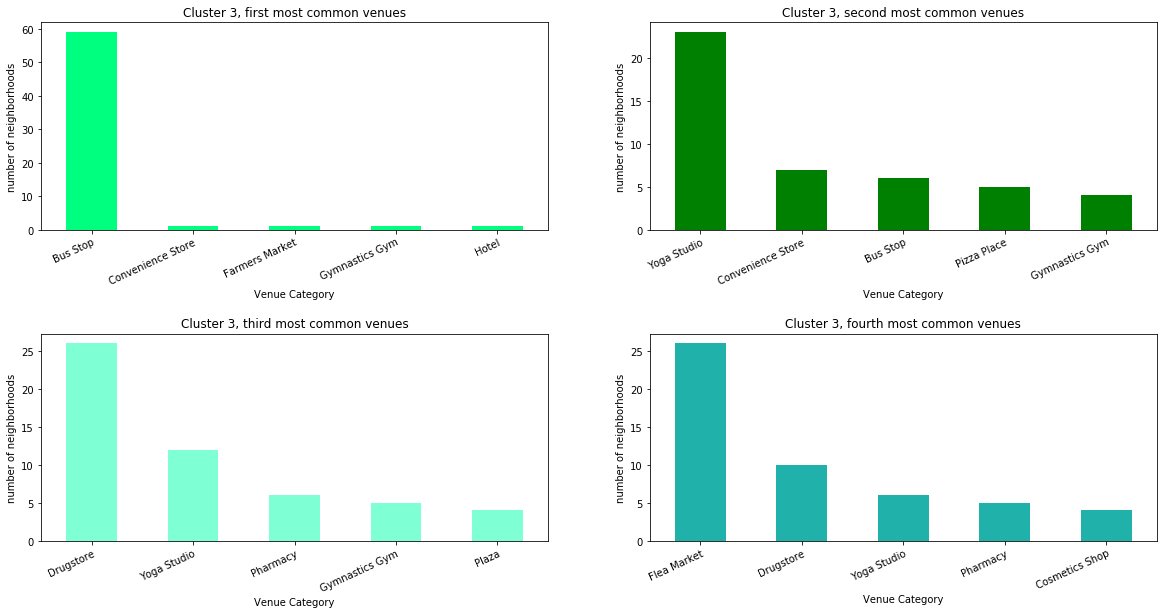

In [554]:
fig3 = plt.figure(figsize=(20, 20)) # create figure
fig3.subplots_adjust(bottom=0.1)
fig3.subplots_adjust(top=1,hspace=0.5)

ax03 = fig3.add_subplot(2, 2, 1) # add subplot 1 
ax13 = fig3.add_subplot(2, 2, 2) # add subplot 2 
ax23 = fig3.add_subplot(2, 2, 3) # add subplot 3 
ax33 = fig3.add_subplot(2, 2, 4) # add subplot 4

# Subplot 1: 
Cluster_3_1st_mc['Neighborhood'][0:5].plot(kind='bar', color='springgreen', figsize=(20, 8), ax=ax03) # add to subplot 1
ax03.set_title('Cluster 3, first most common venues')
ax03.set_ylabel('number of neighborhoods')
ax03.set_xlabel('Venue Category')

plt.setp(ax03.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")# Rotate the tick labels and set their alignment.

# Subplot 2: 
Cluster_3_2nd_mc['Neighborhood'][0:5].plot(kind='bar',color='green', figsize=(20, 8), ax=ax13) # add to subplot 2
ax13.set_title ('Cluster 3, second most common venues')
ax13.set_ylabel('number of neighborhoods')
ax13.set_xlabel('Venue Category')
plt.setp(ax13.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")

# Subplot 3: 
Cluster_3_3rd_mc['Neighborhood'][0:5].plot(kind='bar',color='aquamarine', figsize=(20, 8), ax=ax23) # add to subplot 3
ax23.set_title ('Cluster 3, third most common venues')
ax23.set_ylabel('number of neighborhoods')
ax23.set_xlabel('Venue Category')
plt.setp(ax23.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")


# Subplot 4: 
Cluster_3_4th_mc['Neighborhood'][0:5].plot(kind='bar',color='lightseagreen', figsize=(20, 8), ax=ax33) # add to subplot 3
ax33.set_title ('Cluster 3, fourth most common venues')
ax33.set_ylabel('number of neighborhoods')
ax33.set_xlabel('Venue Category')
plt.setp(ax33.get_xticklabels(), rotation=25, ha="right", rotation_mode="anchor")

plt.show()

In [516]:
Cluster_4_1st_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==4].groupby('1st Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [517]:
Cluster_4_2nd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==4].groupby('2nd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [518]:
Cluster_4_3rd_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==4].groupby('3rd Most Common Venue').count().sort_values('Neighborhood', ascending=False)

In [519]:
Cluster_4_4th_mc=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==4].groupby('4th Most Common Venue').count().sort_values('Neighborhood', ascending=False)

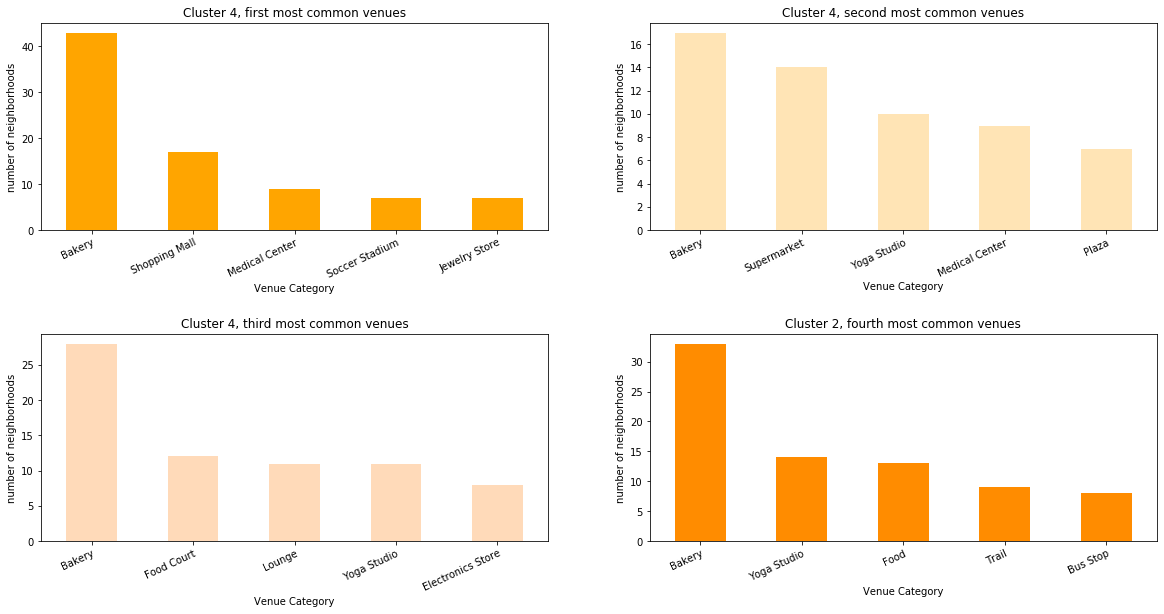

In [560]:
fig4 = plt.figure(figsize=(20, 20)) # create figure
fig4.subplots_adjust(bottom=0.1)
fig4.subplots_adjust(top=1,hspace=0.5)

ax04 = fig4.add_subplot(2, 2, 1) # add subplot 1 
ax14 = fig4.add_subplot(2, 2, 2) # add subplot 2 
ax24 = fig4.add_subplot(2, 2, 3) # add subplot 3 
ax34 = fig4.add_subplot(2, 2, 4) # add subplot 4

# Subplot 1: 
Cluster_4_1st_mc['Neighborhood'][0:5].plot(kind='bar', color='orange', figsize=(20, 8), ax=ax04) # add to subplot 1
ax04.set_title('Cluster 4, first most common venues')
ax04.set_ylabel('number of neighborhoods')
ax04.set_xlabel('Venue Category')

plt.setp(ax04.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")# Rotate the tick labels and set their alignment.

# Subplot 2: 
Cluster_4_2nd_mc['Neighborhood'][0:5].plot(kind='bar',color='moccasin', figsize=(20, 8), ax=ax14) # add to subplot 2
ax14.set_title ('Cluster 4, second most common venues')
ax14.set_ylabel('number of neighborhoods')
ax14.set_xlabel('Venue Category')
plt.setp(ax14.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")

# Subplot 3: 
Cluster_4_3rd_mc['Neighborhood'][0:5].plot(kind='bar',color='peachpuff', figsize=(20, 8), ax=ax24) # add to subplot 3
ax24.set_title ('Cluster 4, third most common venues')
ax24.set_ylabel('number of neighborhoods')
ax24.set_xlabel('Venue Category')
plt.setp(ax24.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")


# Subplot 4: 
Cluster_4_4th_mc['Neighborhood'][0:5].plot(kind='bar',color='darkorange', figsize=(20, 8), ax=ax34) # add to subplot 3
ax34.set_title ('Cluster 2, fourth most common venues')
ax34.set_ylabel('number of neighborhoods')
ax34.set_xlabel('Venue Category')
plt.setp(ax34.get_xticklabels(), rotation=25, ha="right", rotation_mode="anchor")

plt.show()